## Nama : Rafi Fadhlillah
## NIM : 121450143

# **Soal a)** : Selesaikan semua langkah-langkah disetiap metode yang ada pada modul ini !

# **Praktikum 1 : Metode PCA dan LDA**
## 1) Principal Component Analysis using the PCA implementation in scikit-learn
Import Packages

In [ ]:
import matplotlib.pyplot as plt # Mengimpor library Matplotlib untuk visualisasi data
%matplotlib inline
import numpy as np  # Mengimpor library NumPy untuk operasi numerik
import pandas as pd # Mengimpor library pandas untuk bekerja dengan data dalam bentuk dataframe
from sklearn import datasets # Mengimpor dataset dari library scikit-learn
from sklearn.decomposition import PCA  # Mengimpor modul PCA (Principal Component Analysis) dari scikit-learn
from sklearn.preprocessing import StandardScaler # Mengimpor modul StandardScaler dari scikit-learn untuk preprocessing data

Import dataset

In [ ]:
import pandas as pd  # Mengimpor library pandas untuk bekerja dengan data dalam bentuk dataframe

# Membaca file CSV 'HarryPotterTT.csv' dan menyimpannya dalam sebuah dataframe bernama TT_df
TT_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/HarryPotterTT.csv')

# Menampilkan isi dari dataframe TT_df
TT_df


,Name,Magic,Cunning,Courage,Wisdom,Temper
0,'Harry Potter',62,21,42,26,7
1,'Hermione Granger',60,16,40,73,2
2,'Ron Weasley',45,14,40,22,4
3,'Prof. Dumbledore',105,24,39,82,0
4,'Prof. Snape',85,24,19,71,7
5,'Prof. McGonagail',95,19,29,76,5
6,'Prof. Moody',82,20,35,69,5
7,'Rubeus Hagrid',12,11,30,8,7
8,'Fred Weasley',87,13,30,22,4
9,'George Weasley',87,13,30,22,4


Ekstak data <br>
Ekstrak data ke dalam array numpy X. Dan skalakan datanya

In [ ]:
# Mengambil kolom "Name" dari dataframe TT_df dan menyimpannya dalam variabel 'y'
y = TT_df.pop("Name").values

# Mengambil seluruh data dari dataframe TT_df kecuali kolom "Name" dan menyimpannya dalam variabel 'X'
X = TT_df.values

# Menggunakan StandardScaler() dari scikit-learn untuk melakukan preprocessing data pada 'X' dan menyimpan hasilnya dalam 'X_scal'
X_scal = StandardScaler().fit_transform(X)

# Menampilkan bentuk (shape) dari 'X' (jumlah baris dan kolom)
X.shape


(22, 5)

Apply PCA

In [ ]:
# Membuat objek PCA dengan menyebutkan jumlah komponen utama yang diinginkan (dalam hal ini, 4 komponen utama)
pcaHP = PCA(n_components=4)

# Menggunakan metode fit() pada objek PCA untuk memproses data yang telah di-standarisasi (X_scal) dan menghasilkan hasil transformasi
X_r = pcaHP.fit(X_scal).transform(X_scal)

# Mengakses atribut explained_variance_ratio_ dari objek PCA untuk mendapatkan proporsi varians yang dijelaskan oleh setiap komponen utama
pcaHP.explained_variance_ratio_


array([0.48877025, 0.31551511, 0.10842469, 0.0501518 ])

Ada lima fitur yang diproyeksikan ke 4 PC sehingga matriks proyeksinya adalah 4 x 5 dengan code berikut:

In [ ]:
pcaHP.components_ # mengakses matriks komponen utama dari analisis komponen utama (PCA) yang telah dilakukan sebelumnya

array([[ 0.57407296,  0.40754714,  0.3846298 ,  0.57788956, -0.14983036],
       [ 0.10834723,  0.52231617, -0.44046049,  0.0043925 ,  0.72209553],
       [-0.27762934,  0.33155304,  0.76359223, -0.39624817,  0.27001634],
       [ 0.63573329, -0.55900795,  0.19114024, -0.25378831,  0.42709507]])

Plot ke 4 varian PC


(0.0, 0.8)

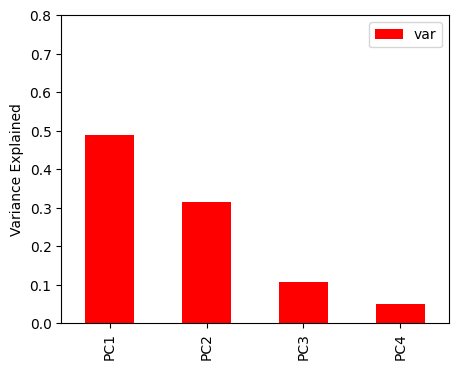

In [ ]:
# Membuat dataframe 'df' dengan proporsi varians dari PCA dan indeks yang disebutkan
df = pd.DataFrame(pcaHP.explained_variance_ratio_, index=["PC1", "PC2", "PC3", "PC4"], columns=['var'])

# Membuat plot batang (bar plot) dari dataframe 'df' dengan warna merah dan ukuran gambar 5x4
pl = df.plot.bar(color='red', figsize=(5, 4))

# Mengatur label sumbu Y pada plot sebagai "Variance Explained"
pl.set_ylabel("Variance Explained")

# Mengatur batas sumbu Y pada plot agar berkisar antara 0 hingga 0.8
pl.set_ylim([0, 0.8])


Plot persebaran data dengan PC1 dan PC2

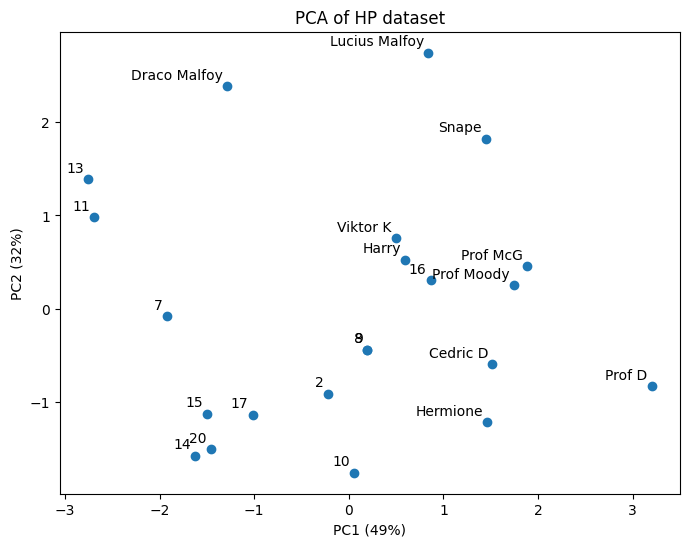

In [ ]:
# Mengimpor library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengatur ukuran gambar plot
plt.figure(figsize=(8, 6))

# Mengatur lebar garis (linewidth)
lw = 2

# Membuat daftar 'labels' yang berisi nama karakter dengan indeks yang sesuai
labels = list(range(len(y)))

# Mengganti beberapa indeks dalam 'labels' dengan nama karakter yang sesuai
labels[0] = 'Harry'
labels[1] = 'Hermione'
labels[3] = 'Prof D'
labels[5] = 'Prof McG'
labels[6] = 'Prof Moody'
labels[18] = 'Cedric D'
labels[19] = 'Viktor K'
labels[21] = 'Lucius Malfoy'
labels[4] = 'Snape'
labels[12] = 'Draco Malfoy'

# Membuat scatter plot dengan data dari PC1 dan PC2
plt.scatter(X_r[:, 0], X_r[:, 1])

# Menambahkan label untuk setiap titik pada plot
for label, xi, yi in zip(labels, X_r[:, 0], X_r[:, 1]):
    plt.annotate(
        label,
        xy=(xi, yi), xytext=(-3, 3),
        textcoords="offset points", ha='right', va="bottom")

# Menyertakan label sumbu X
plt.xlabel('PC1 (49%)')

# Menyertakan label sumbu Y
plt.ylabel('PC2 (32%)')

# Menyertakan judul plot
plt.title('PCA of HP dataset')

# Menampilkan plot
plt.show()


## 2) Linear Discriminant Analysis using the LDA implementation in scikit-learn.

Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from collections import Counter
from sklearn.metrics import accuracy_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

Import dataset

In [ ]:
# Mengimpor library pandas dan membaca file CSV 'penguins.csv', dengan kolom pertama (index) sebagai indeks data
penguins_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/penguins.csv', index_col=0)

# Mengambil kolom 'species' dari dataframe dan menyimpannya dalam variabel 'y'
y = penguins_df.pop('species').values

# Mengambil semua kolom (atribut) dari dataframe sebagai data mentah (X_raw)
X_raw = penguins_df.values

# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=1 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Menggunakan StandardScaler() dari scikit-learn untuk melakukan preprocessing data pada data pelatihan (X_train) dan data pengujian (X_test)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Mengambil nama fitur (atribut) dari dataframe sebagai daftar 'feature_names'
feature_names = penguins_df.columns

# Menampilkan bentuk (shape) dataframe penguins_df
print(penguins_df.shape)

# Menampilkan lima baris pertama dari dataframe penguins_df
penguins_df.head()


(333, 4)


,bill_length,bill_depth,flipper_length,body_mass
0,39.1,18.7,181.0,3750.0
1,39.5,17.4,186.0,3800.0
2,40.3,18.0,195.0,3250.0
3,36.7,19.3,193.0,3450.0
4,39.3,20.6,190.0,3650.0


Menampilkan data y

In [ ]:
# Menggunakan Counter untuk menghitung kemunculan setiap nilai kategori dalam 'y' dan mengambil kunci-kuncinya
types = list(Counter(y).keys())
types

['Adelie', 'Gentoo', 'Chinstrap']

Apply LDA

In [ ]:
# Membuat objek LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis()

# Melatih model LDA menggunakan data pelatihan
lda.fit(X_train, y_train)

# Menggunakan model LDA yang telah dilatih untuk mengubah data pelatihan ke dalam ruang fitur yang baru
X_tr_lda = lda.transform(X_train)

# Mengambil bentuk (shape) dari data yang telah diubah menggunakan LDA
X_tr_lda.shape


(166, 2)

Plot LDA

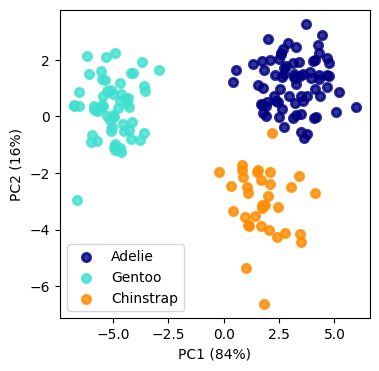

In [ ]:
# Mengimpor library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengatur ukuran gambar plot
plt.figure(figsize=(4, 4))

# Warna-warna yang akan digunakan pada scatter plot
colors = ['navy', 'turquoise', 'darkorange']

# Ketebalan garis pada plot
lw = 2

# Loop melalui setiap kategori (jenis) dalam 'types'
for color, target_name in zip(colors, types):
    # Membuat scatter plot untuk setiap kategori dengan warna yang sesuai
    # X_tr_lda[y_train == target_name, 0] mengambil komponen pertama (PC1) untuk kategori tertentu
    # X_tr_lda[y_train == target_name, 1] mengambil komponen kedua (PC2) untuk kategori tertentu
    plt.scatter(X_tr_lda[y_train == target_name, 0], X_tr_lda[y_train == target_name, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

# Menampilkan legenda pada plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Menyertakan label sumbu X
plt.xlabel('PC1 (84%)')

# Menyertakan label sumbu Y
plt.ylabel('PC2 (16%)')

# Menampilkan plot
plt.show()


Hitung akurasi


In [ ]:
# Melakukan prediksi menggunakan model LDA yang telah dilatih pada data pengujian (X_test)
y_pred = lda.predict(X_test)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
accuracy = accuracy_score(y_pred, y_test)

# Menampilkan nilai akurasi
print("Akurasi:", accuracy)


Akurasi: 0.9700598802395209


Penggunaan PCA

In [ ]:
# Membuat objek PCA dengan menyebutkan jumlah komponen utama yang diinginkan (dalam hal ini, 4 komponen utama)
pca = PCA(n_components=4)

# Menggunakan metode fit() pada objek PCA untuk memproses data pelatihan yang telah di-standarisasi (X_train) dan menghasilkan hasil transformasi
X_tr_pca = pca.fit(X_train).transform(X_train)

# Mengakses atribut explained_variance_ratio_ dari objek PCA untuk mendapatkan proporsi varians yang dijelaskan oleh setiap komponen utama
explained_variance_ratio = pca.explained_variance_ratio_
# Proportion of variance explained for each components
pca.explained_variance_ratio_

array([0.67991833, 0.20387145, 0.08721252, 0.0289977 ])

Plot PCA untuk perbandingan

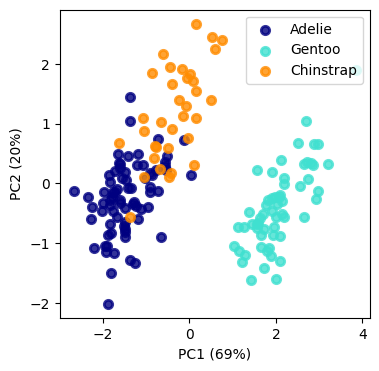

In [ ]:
# Mengimpor library Matplotlib untuk visualisasi data
import matplotlib.pyplot as plt

# Mengatur ukuran gambar plot
plt.figure(figsize=(4, 4))

# Ketebalan garis pada plot
lw = 2

# Loop melalui setiap kategori (jenis) dalam 'types'
for color, target_name in zip(colors, types):
    # Membuat scatter plot untuk setiap kategori dengan warna yang sesuai
    # X_tr_pca[y_train == target_name, 0] mengambil komponen pertama (PC1) untuk kategori tertentu
    # X_tr_pca[y_train == target_name, 1] mengambil komponen kedua (PC2) untuk kategori tertentu
    plt.scatter(X_tr_pca[y_train == target_name, 0], X_tr_pca[y_train == target_name, 1],
                color=color, alpha=0.8, lw=lw, label=target_name)

# Menampilkan legenda pada plot
plt.legend(loc='best', shadow=False, scatterpoints=1)

# Menyertakan label sumbu X
plt.xlabel('PC1 (69%)')

# Menyertakan label sumbu Y
plt.ylabel('PC2 (20%)')

# Menampilkan plot
plt.show()


# **Praktikum 2 : Metode Filter**
## 1) Feature Selection using Filters
Metode filter digunakan dengan mengimpletasikan teorema Chi square statistic dan Information Gain.

Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import chi2, mutual_info_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

Import dataset

In [ ]:
# Mengimpor library pandas dan membaca file CSV 'segmentation-all.csv'
seg_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/segmentation-all.csv')

# Menampilkan bentuk (shape) dari dataframe 'seg_data'
print(seg_data.shape)

# Menampilkan lima baris pertama dari dataframe 'seg_data'
seg_data.head()


(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


Mengitung data pada variabel target

In [ ]:
seg_data['Class'].value_counts() # Menggunakan metode value_counts() pada kolom 'Class' untuk menghitung jumlah masing-masing nilai kategori yang ada

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

Split data

In [ ]:
# Mengambil kolom 'Class' dari dataframe 'seg_data' dan menyimpannya dalam variabel 'y'
y = seg_data.pop("Class").values

# Mengambil semua kolom lainnya dari dataframe 'seg_data' sebagai atribut mentah (X_raw)
X_raw = seg_data.values

# Memisahkan data menjadi data pelatihan (train) dan data pengujian (test) menggunakan train_test_split
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=1 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=1, test_size=1/2)

# Menggunakan MinMaxScaler() dari scikit-learn untuk melakukan scaling (normalisasi) pada data pelatihan (X_train) dan data pengujian (X_test)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Mengambil nama fitur (kolom) dari dataframe 'seg_data' sebagai daftar 'feature_names'
feature_names = seg_data.columns

# Menampilkan bentuk (shape) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape


((1155, 19), (1155, 19))

Feature Scores

In [ ]:
# Mengimpor chi2 dari library scikit-learn
from sklearn.feature_selection import chi2

# Menghitung skor Chi-Square dan p-value untuk setiap fitur dalam data pelatihan (X_train) terhadap label kelas (y_train)
chi2_score, pval = chi2(X_train, y_train)

# Mengubah nilai NaN (jika ada) dalam skor Chi-Square menjadi angka nol (0)
chi2_score = np.nan_to_num(chi2_score)

# Menampilkan skor Chi-Square untuk setiap fitur
chi2_score


array([ 14.99569813, 114.86161054,   0.        ,  13.47060858,
        27.33137409,  14.52455789,  20.00650221,  17.74732567,
        15.4768292 , 293.4360061 , 290.96380025, 303.47783064,
       290.11739498,  54.25395182, 111.01924229,  92.91780859,
       287.66891553,  81.64654774, 268.86221356])

In [ ]:
# Menghitung skor Information Gain (i-scores) untuk setiap fitur dalam data pelatihan (X_train) terhadap label kelas (y_train)
i_scores = mutual_info_classif(X_train, y_train)

# Menampilkan skor Information Gain untuk setiap fitur
i_scores

array([0.13622611, 0.96584461, 0.        , 0.00191158, 0.00678435,
       0.49213333, 0.31833406, 0.46532666, 0.35826751, 1.15503933,
       1.21523467, 1.10315649, 1.14209891, 0.76676465, 0.92039183,
       0.96759632, 1.13600839, 0.93120661, 1.13777342])

Simpan skor

In [ ]:
# Membuat dataframe 'df' dengan kolom 'Mutual Info.' (i-scores), 'Chi Square' (chi2_score), dan 'Feature' (nama fitur)
df = pd.DataFrame({'Mutual Info.': i_scores, 'Chi Square': chi2_score, 'Feature': feature_names})

# Mengatur kolom 'Feature' sebagai indeks (index) dalam dataframe 'df'
df.set_index('Feature', inplace=True)

# Mengurutkan dataframe 'df' berdasarkan skor Mutual Information secara menurun (descending)
df.sort_values('Mutual Info.', inplace=True, ascending=False)

# Menampilkan dataframe 'df'
df


,Mutual Info.,Chi Square
Feature,,
RAWRED-MEAN,1.215235,290.963800
INTENSITY-MEAN,1.155039,293.436006
RAWGREEN-MEAN,1.142099,290.117395
HUE-MEAN,1.137773,268.862214
VALUE-MEAN,1.136008,287.668916
RAWBLUE-MEAN,1.103156,303.477831
EXGREEN-MEAN,0.967596,92.917809
REGION-CENTROID-ROW,0.965845,114.861611
SATURATION-MEAN,0.931207,81.646548


Plotting the Filter score

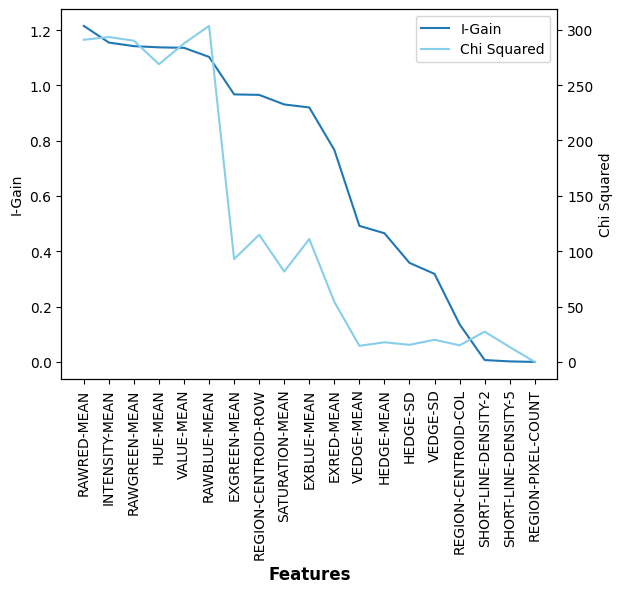

In [ ]:
# Membuat sebuah gambar dan sumbu tunggal
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
# Membuat sumbu kedua (twinx) yang berbagi sumbu X dengan sumbu utama
ax2 = ax.twinx()

# Membuat plot garis untuk skor Mutual Information (I-Gain) pada sumbu utama (ax)
ax.plot(df.index, df["Mutual Info."], label='I-Gain')

# Membuat plot garis untuk skor Chi-Square pada sumbu kedua (ax2)
ax2.plot(df.index, df["Chi Square"], color="skyblue", label='Chi Squared')

# Menetapkan label sumbu X berdasarkan nama fitur (feature names) dengan rotasi 90 derajat untuk memudahkan pembacaan
ax.set_xticks(rr)
ax.set_xticklabels(list(df.index), rotation=90)

# Menetapkan label sumbu X, sumbu Y untuk sumbu utama (ax)
ax.set_xlabel('Features', fontsize=12, fontweight="bold")
ax.set_ylabel('I-Gain')

# Menetapkan label sumbu Y untuk sumbu kedua (ax2)
ax2.set_ylabel('Chi Squared')

# Menambahkan legenda ke gambar dengan posisi di sudut kanan atas (upper right)
fig.legend(loc="upper right", bbox_to_anchor=(1, 1), bbox_transform=ax.transAxes)

# Menampilkan plot
plt.show()

Hitung korelasi

In [ ]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores) # Menghitung korelasi Spearman antara skor Chi-Square dan skor Information Gain

SignificanceResult(statistic=0.9122807017543859, pvalue=5.3112736359678667e-08)

Dari hasil menunjukan bahwa kedua skor tersebut berkorelasi cukup baik.
Dengan nilai korelasi Spearman sebesar 0,9.

## 2) Correlation Based Feature Selection (CFS)

Import Packages

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

Import CFS

In [ ]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

# **Example 1: CFS on Segmentation dataset**

In [ ]:
seg_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/segmentation-all.csv')
print(seg_data.shape)
seg_data.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
# Mengambil kolom 'Class' dari dataframe 'seg_data' dan menyimpannya dalam variabel 'y'
y = seg_data.pop('Class').values

# Mengambil semua kolom lainnya dari dataframe 'seg_data' sebagai atribut mentah ('X_raw')
X_raw = seg_data.values

# Memisahkan data menjadi data pelatihan ('X_train' dan 'y_train') dan data pengujian ('X_test' dan 'y_test')
# dengan pembagian data pengujian sebesar 1/2 (test_size=1/2) dan random_state=2 untuk reproduktibilitas
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y, random_state=2, test_size=1/2)

# Menggunakan MinMaxScaler() dari scikit-learn untuk melakukan normalisasi data pada data pelatihan ('X_train') dan kemudian menerapkannya pada data pengujian ('X_test')
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)

# Menghitung panjang maksimum (jumlah baris) dari data pelatihan
max_length = X_train.shape[0]

# Menghitung jumlah fitur (kolom) dalam data pelatihan
feat_num = X_train.shape[1]

# Menampilkan bentuk (jumlah baris dan kolom) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape


((1155, 19), (1155, 19))

In [ ]:
# Membuat objek KNeighborsClassifier dengan 5 tetangga terdekat
kNN = KNeighborsClassifier(n_neighbors=5)

# Melatih model k-NN pada data pelatihan
kNN = kNN.fit(X_train, y_train)

# Melakukan prediksi pada data pengujian
y_pred = kNN.predict(X_test)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Melakukan validasi silang (cross-validation) dengan 8 fold pada data pelatihan
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

# Menampilkan akurasi validasi silang rata-rata
print("Cross-Validation on training all features: {0:.3f}".format(cv_acc.mean()))

# Menampilkan akurasi pada data pengujian (hold-out testing)
print("Hold Out testing all features: {0:.3f}".format(acc))

Cross-Validation on training all features: 0.946
Hold Out testing all features: 0.940


## Forward Search - CFS

Here, the best feature subset is found by finding the best single feature subset using merit score then adding all other features to this best feature and recomputing the merit. This process continues until merit score stops increasing.

In [ ]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.43951449 0.44021037]
Selected Feature index: (17, 18)


In [ ]:
# Print the selected features
feature_names_sel = seg_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN'], dtype='object')

#### Evaluate on Test Data

In [ ]:
# Menggunakan hanya fitur-fitur yang terpilih setelah seleksi fitur CFS_FS pada data pelatihan dan data pengujian
X_train_CFS_FS = X_train[:, sel_comb]
X_test_CFS_FS = X_test[:, sel_comb]

# Melatih model k-NN pada data pelatihan yang telah dipilih fiturnya
kNN_CFS_FS = kNN.fit(X_train_CFS_FS, y_train)

# Melakukan prediksi pada data pengujian yang telah dipilih fiturnya
y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc_CFS_FS = accuracy_score(y_pred, y_test)

# Menghitung akurasi validasi silang (cross-validation) dengan 8 fold pada data pelatihan yang telah dipilih fiturnya
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

# Menampilkan akurasi rata-rata hasil validasi silang
print("Cross-Validation on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))

# Menampilkan akurasi pada data pengujian (hold-out testing) yang telah dipilih fiturnya
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

Cross-Validation on training selected features: 0.874
Hold Out testing selected features: 0.847


### Best First Search - CFS

The stopping criteria for this implementation is where 5 consecutive non-improving feature subsets are found.

In [ ]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([17, 18,  8,  6, 10,  9])

In [ ]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['SATURATION-MEAN', 'HUE-MEAN', 'HEDGE-SD', 'VEDGE-SD', 'RAWRED-MEAN',
       'INTENSITY-MEAN'],
      dtype='object')

In [ ]:
# Inisialisasi dua list kosong untuk menyimpan merit score dan akurasi validasi silang
merit = []
cv_acc_CFS = []

# Iterasi melalui berbagai ukuran subset fitur yang telah terpilih
for i in range(1, len(Sel_feat) + 1):
    # Mengambil subset fitur dari data pelatihan sesuai dengan ukuran subset saat ini
    X_train_CFS = X_train[:, Sel_feat[0:i]]

    # Menghitung merit score untuk subset fitur yang dipilih
    merit.insert(i, merit_calculation(X_train_CFS, y_train))

    # Melatih model k-Nearest Neighbors (k-NN) pada subset fitur yang dipilih
    kNN_CFS = kNN.fit(X_train_CFS, y_train)

    # Menghitung akurasi validasi silang dengan 8 fold pada data pelatihan yang telah dipilih fiturnya
    cv_acc_CFS.insert(i, cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

# Menyimpan nilai merit score untuk berbagai ukuran subset fitur
merit


[0.43951448818147326,
 0.44021037374992716,
 0.43767125770380755,
 0.43619307358905546,
 0.43539938594841915,
 0.4339188253042891]

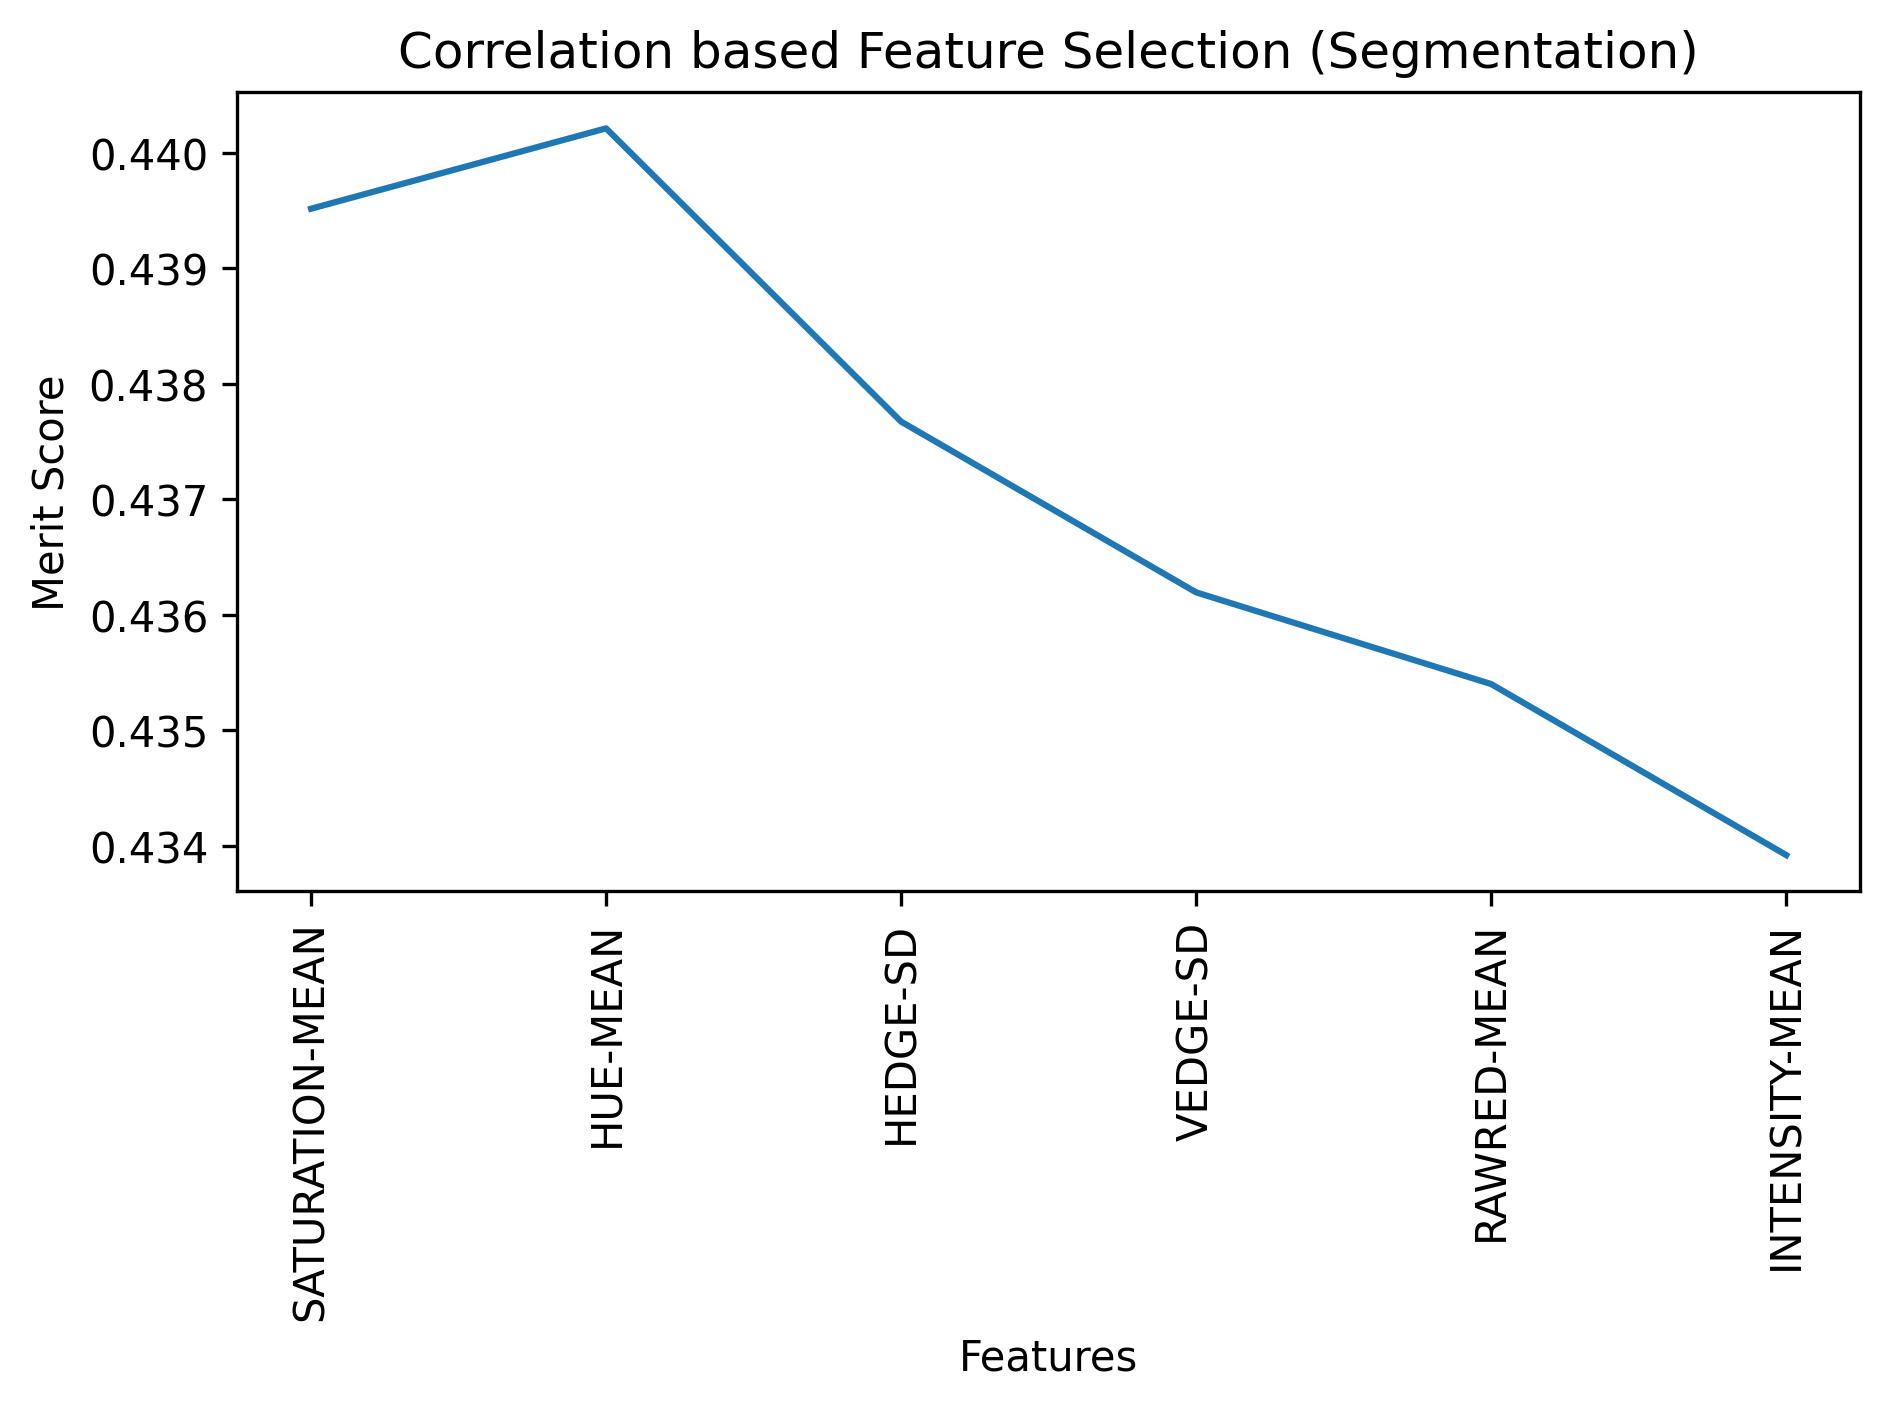

In [ ]:
# Membuat gambar (figure) dengan resolusi (dpi) 300
f1 = plt.figure(dpi=300)

# Menggambar plot garis yang menunjukkan perubahan merit score
plt.plot(feature_names_sel, merit)

# Memberi judul plot
plt.title("Correlation based Feature Selection (Segmentation)")

# Mengatur label pada sumbu X dengan rotasi 90 derajat untuk memudahkan pembacaan
plt.xticks(rotation=90)

# Menambahkan label pada sumbu X dan Y
plt.xlabel("Features")
plt.ylabel("Merit Score")

# Mengatur tata letak plot
plt.tight_layout()

#### Evaluate on test data

In [ ]:
# Menggunakan hanya fitur-fitur yang terpilih setelah seleksi fitur CFS pada data pengujian
X_test_CFS = X_test[:, Sel_feat]

# Melatih model k-NN pada data pelatihan yang telah dipilih fiturnya
kNN_CFS = kNN.fit(X_train_CFS, y_train)

# Melakukan prediksi pada data pengujian yang juga telah dipilih fiturnya
y_pred = kNN_CFS.predict(X_test_CFS)

# Menghitung akurasi prediksi dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc_CFS = accuracy_score(y_pred, y_test)

# Melakukan validasi silang (cross-validation) dengan 8 fold pada data pelatihan yang telah dipilih fiturnya
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

# Menampilkan akurasi rata-rata hasil validasi silang
print("Cross-Validation on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))

# Menampilkan akurasi pada data pengujian (hold-out testing) yang telah dipilih fiturnya
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))


Cross-Validation on training selected features: 0.900
Hold Out testing selected features: 0.887


### Plot Results

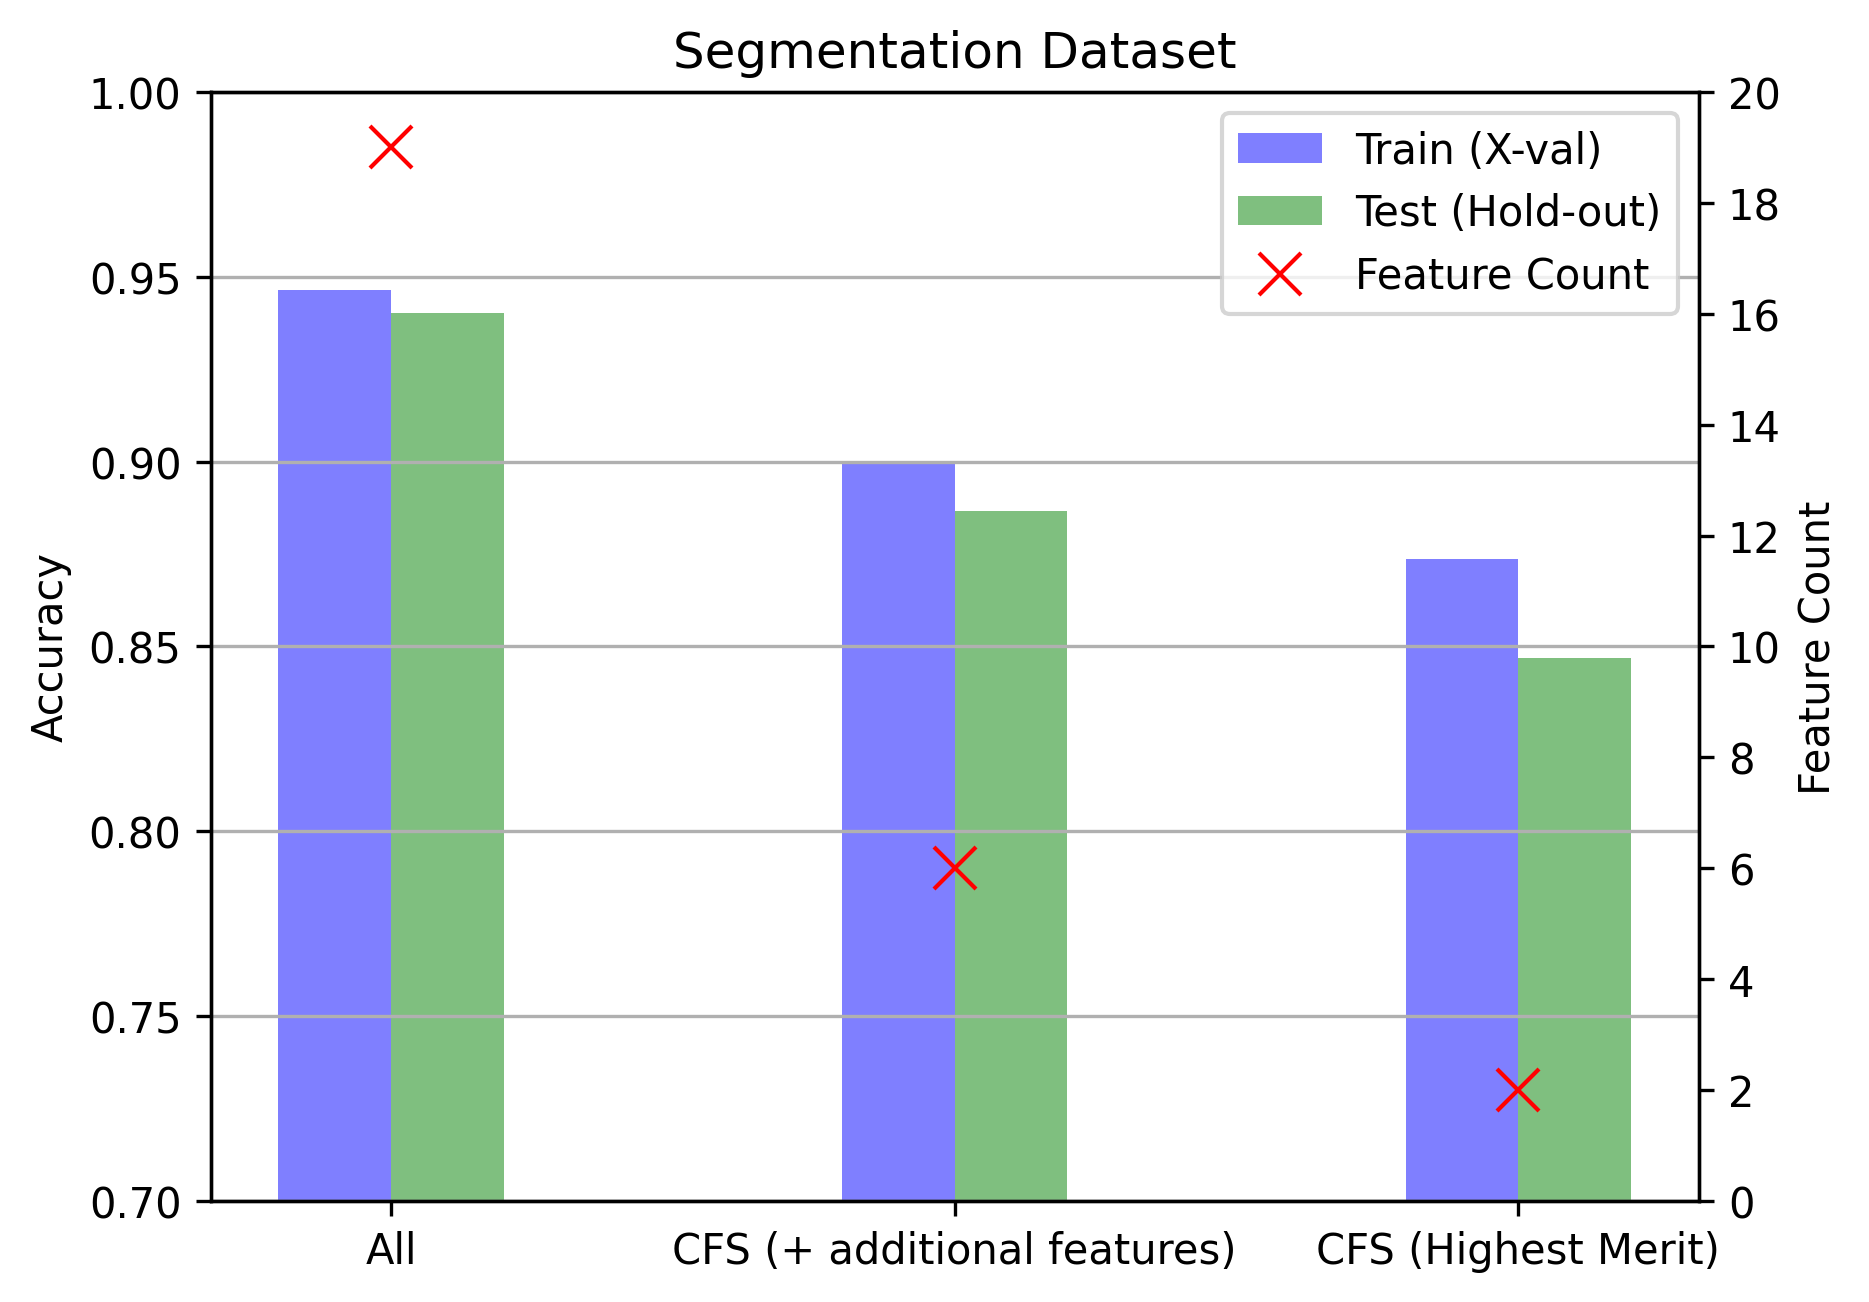

In [ ]:
# Membuat gambar (figure) dengan resolusi (dpi) 300
fig, ax = plt.subplots(dpi=300)

# Lebar batang dalam diagram
width = 0.2

# Opsi konfigurasi model, jumlah fitur, akurasi pada data pelatihan (cross-validation), dan akurasi pada data pengujian (hold-out testing)
options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc, acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

# Menentukan posisi sumbu Y
y_pos = np.arange(len(options))

# Menggambar batang untuk akurasi pada data pelatihan (cross-validation)
p1 = ax.bar(y_pos - width/2, xv, width, align='center', label='Train (X-val)',
            color=['blue', 'blue', 'blue'], alpha=0.5)

# Menggambar batang untuk akurasi pada data pengujian (hold-out testing)
p2 = ax.bar(y_pos + width/2, accs, width, align='center', label='Test (Hold-out)',
            color=['g', 'g', 'g'], alpha=0.5)

# Mengatur rentang sumbu Y pada subplot pertama
ax.set_ylim([0.7, 1])

# Membuat subplot kedua yang berbagi sumbu X dengan subplot pertama
ax2 = ax.twinx()

# Menggambar garis untuk jumlah fitur pada subplot kedua
p3 = ax2.plot([0, 1, 2], n_feat, color='red', label='Feature Count', marker='x', ms=10, linewidth=0)

# Mengatur rentang sumbu Y pada subplot kedua
ax2.set_ylim([0, 20])

# Menampilkan garis-garis grid pada sumbu Y pada subplot pertama
ax.grid(axis='y')

# Mendapatkan label dan legenda dari subplot pertama dan subplot kedua
h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()

# Menggabungkan label dan legenda dari kedua subplot
ax2.legend(h1 + h2, l1 + l2, loc='upper right')

# Mengatur tanda sumbu Y pada subplot kedua untuk tampilan bilangan bulat
ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

# Menampilkan label pada sumbu X sesuai dengan opsi konfigurasi model
plt.xticks(y_pos, options)

# Memberi label pada sumbu Y pada subplot pertama dan subplot kedua
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')

# Menambahkan judul pada plot
plt.title("Segmentation Dataset")

# Menampilkan plot
plt.show()

# **Praktikum 3 : Metode Embedded (D-Tree)**
Pemilihan fitur tersirat dalam konstruksi pohon keputusan (decision tree) karena
biasanya tidak semua fitur akan muncul.

Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

Import dataset

In [ ]:
# Membaca dataset penguins dari file CSV dengan indeks kolom pertama (index_col = 0)
penguins_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/penguins.csv', index_col=0)

# Mengambil nama-nama fitur dari dataset
feature_names = penguins_df.columns

# Menampilkan dimensi dataset (jumlah baris, jumlah kolom) menggunakan .shape
print(penguins_df.shape)

# Menampilkan lima baris pertama dari dataset menggunakan .head()
penguins_df.head()


(333, 5)


,bill_length,bill_depth,flipper_length,body_mass,species
0,39.1,18.7,181.0,3750.0,Adelie
1,39.5,17.4,186.0,3800.0,Adelie
2,40.3,18.0,195.0,3250.0,Adelie
3,36.7,19.3,193.0,3450.0,Adelie
4,39.3,20.6,190.0,3650.0,Adelie


Hitung data pada variabel target

In [ ]:
penguins_df['species'].value_counts() #menghitung nilai yang terdapat dalam atribut spesies

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

Muat data ke dalam array numpy dan split menjadi set pelatihan dan
pengujian.


In [ ]:
# Mengambil kolom 'species' dari dataset sebagai label (y)
y = penguins_df.pop('species').values

# Mengambil fitur-fitur lainnya sebagai data fitur (X)
X = penguins_df.values

# Memecah dataset menjadi data pelatihan (X_train dan y_train) dan data pengujian (X_test dan y_test)
# Dalam hal ini, kita menggunakan 50% data sebagai data pengujian dengan test_size=1/2
# random_state=1 digunakan untuk mereproduksi hasil yang sama jika kode ini dijalankan lagi
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=1/2)

# Mengambil nama-nama fitur dari dataset yang tersisa (setelah kolom 'species' dihapus)
feature_names = penguins_df.columns

# Menampilkan bentuk (jumlah baris dan kolom) dari data pelatihan (X_train) dan data pengujian (X_test)
X_train.shape, X_test.shape

((166, 4), (167, 4))

Dengan D-Trees tidak perlu menskalakan data.


Tree with no pruning (Full Tree) <br>
Tampilkan nilai akurasi

In [ ]:
# Membuat model Decision Tree dengan kriteria pemilihan fitur 'entropy'
ftree = DecisionTreeClassifier(criterion='entropy')

# Melatih model Decision Tree menggunakan data pelatihan (X_train dan y_train)
ftree = ftree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = ftree.predict(X_test)

# Menghitung akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.93


Plot D-Tree

[Text(0.6, 0.9, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.7, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.3, 0.5, 'bill_depth <= 16.65\n75\n[74, 1, 0]\nAdelie'),
 Text(0.2, 0.3, 'bill_length <= 39.5\n8\n[7, 1, 0]\nAdelie'),
 Text(0.1, 0.1, '7\n[7, 0, 0]\nAdelie'),
 Text(0.3, 0.1, '1\n[0, 1, 0]\nGentoo'),
 Text(0.4, 0.3, '67\n[67, 0, 0]\nAdelie'),
 Text(0.5, 0.5, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.7, 'bill_depth <= 18.4\n63\n[0, 5, 58]\nChinstrap'),
 Text(0.7, 0.5, '58\n[0, 0, 58]\nChinstrap'),
 Text(0.9, 0.5, '5\n[0, 5, 0]\nGentoo')]

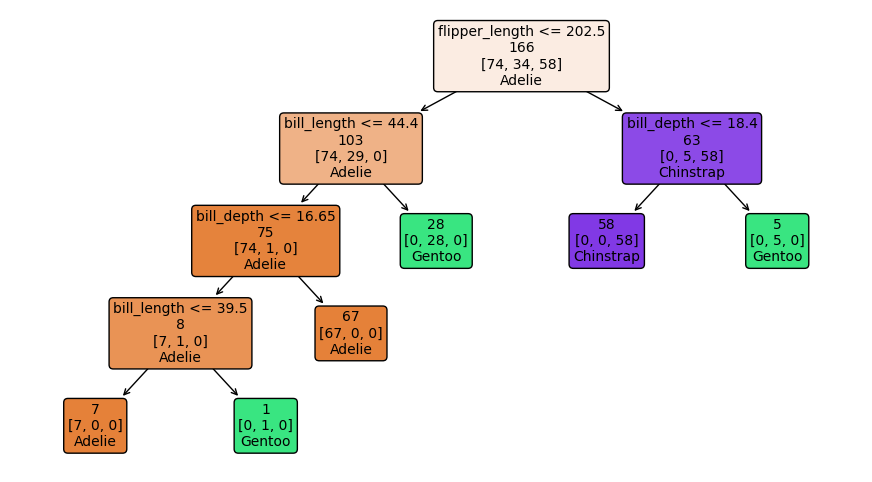

In [ ]:
# Mengatur ukuran gambar yang akan digambar
plt.figure(figsize=(11,6))

# Menggambar pohon keputusan menggunakan fungsi plot_tree dari library scikit-learn
tree.plot_tree(ftree, fontsize = 10, feature_names=feature_names,
                      class_names=['Adelie', 'Gentoo', 'Chinstrap'],
                      label ='none', filled=True, impurity = False,
               rounded=True)

Tampilkan fitur penting


In [ ]:
# Mendapatkan nilai penting fitur dari model Decision Tree
fi = ftree.feature_importances_

# Menggunakan loop for untuk mencetak nilai penting fitur dan nama fitur yang sesuai
for fi_val, f_name in zip(fi, feature_names):
    print(" %4.2f %s" % (fi_val, f_name))


 0.34 bill_length
 0.11 bill_depth
 0.55 flipper_length
 0.00 body_mass


How many leaves in this tree?

In [ ]:
ftree.get_n_leaves() # menampilkan jumlah leaves

6

Pruned Tree<br>
Dari jumlah pohon yang ada pada tahap full tree kita akan memangkas
menjadi 3 pohon saja.


Tampilkan nilai akurasi

In [ ]:
# Membuat model Decision Tree dengan kriteria pemilihan fitur 'entropy' dan pembatasan pada jumlah daun maksimum (max_leaf_nodes) sebesar 3
p_tree = DecisionTreeClassifier(criterion='entropy', max_leaf_nodes=3)

# Melatih model Decision Tree menggunakan data pelatihan (X_train dan y_train)
p_tree = p_tree.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = p_tree.predict(X_test)

# Mengukur akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy %4.2f" % (acc))

Test set accuracy 0.89


Plot D-Tree

[Text(0.6, 0.8333333333333334, 'flipper_length <= 202.5\n166\n[74, 34, 58]\nAdelie'),
 Text(0.4, 0.5, 'bill_length <= 44.4\n103\n[74, 29, 0]\nAdelie'),
 Text(0.2, 0.16666666666666666, '75\n[74, 1, 0]\nAdelie'),
 Text(0.6, 0.16666666666666666, '28\n[0, 28, 0]\nGentoo'),
 Text(0.8, 0.5, '63\n[0, 5, 58]\nChinstrap')]

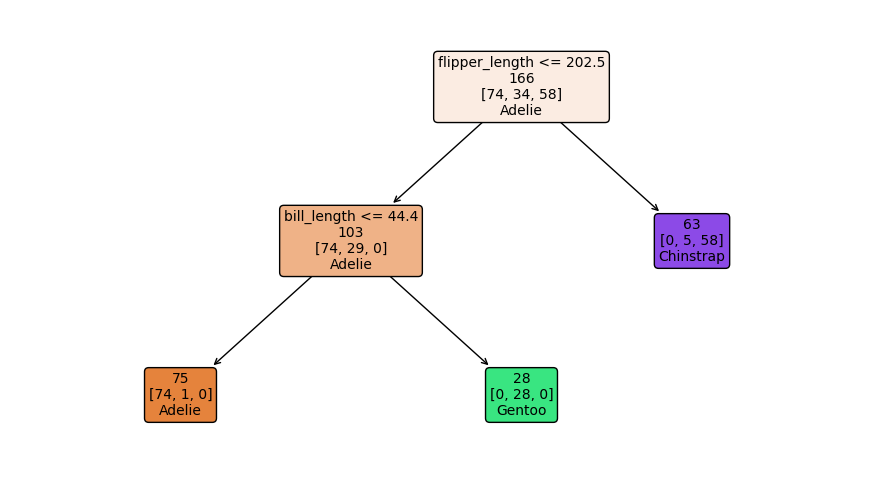

In [ ]:
plt.figure(figsize=(11,6))
tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
                      class_names=['Adelie', 'Gentoo', 'Chinstrap'],
                      label = 'none', filled=True, impurity = False,
               rounded=True)

Tampilkan fitur penting

In [ ]:
# Mendapatkan nilai penting fitur dari model Decision Tree yang telah dibatasi jumlah daun maksimum
fi = p_tree.feature_importances_

# Menggunakan loop for untuk mencetak nilai penting fitur dan nama fitur yang sesuai
for fi_val, f_name in zip(fi, feature_names):
    print("%4.2f %s" % (fi_val, f_name))


0.37 bill_length
0.00 bill_depth
0.63 flipper_length
0.00 body_mass


# **Praktikum 4 : Permutation Feature Importance and Wrapper**
## 1) Permutation Feature Importance
Import Packages

In [ ]:
import pandas as pd
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

Import dataset


In [ ]:
# Membuat daftar nama kolom (column headers) dari 0 hingga 33, lalu menambahkan 'class' sebagai nama kolom terakhir
col_heads = [str(x) for x in range(34)]
col_heads.append('class')

# Membaca dataset "ionosphere.csv" dengan mengatur nama kolom sesuai dengan daftar col_heads
# Menggunakan na_values='?' untuk mengatasi nilai-nilai yang hilang yang ditandai dengan tanda tanya (?)
# Header=None digunakan untuk memastikan bahwa baris pertama dataset juga dibaca sebagai data, bukan sebagai header kolom
ion_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/ionosphere.csv', names=col_heads, na_values='?', header=None)

# Menghapus baris yang mengandung nilai-nilai yang hilang (missing values) dengan menggunakan dropna
ion_data.dropna(axis=0, inplace=True)

# Mencetak dimensi dataset (jumlah baris dan kolom) setelah menghapus nilai-nilai yang hilang
print(ion_data.shape)

# Menampilkan lima baris pertama dari dataset yang telah dibaca dan diproses
ion_data.head()


(351, 35)


,0,1,2,3,4,5,6,7,8,9,...,25,26,27,28,29,30,31,32,33,class
0,1,0,0.99539,-0.05889,0.85243,0.02306,0.83398,-0.37708,1.00000,0.03760,...,-0.51171,0.41078,-0.46168,0.21266,-0.34090,0.42267,-0.54487,0.18641,-0.45300,g
1,1,0,1.00000,-0.18829,0.93035,-0.36156,-0.10868,-0.93597,1.00000,-0.04549,...,-0.26569,-0.20468,-0.18401,-0.19040,-0.11593,-0.16626,-0.06288,-0.13738,-0.02447,b
2,1,0,1.00000,-0.03365,1.00000,0.00485,1.00000,-0.12062,0.88965,0.01198,...,-0.40220,0.58984,-0.22145,0.43100,-0.17365,0.60436,-0.24180,0.56045,-0.38238,g
3,1,0,1.00000,-0.45161,1.00000,1.00000,0.71216,-1.00000,0.00000,0.00000,...,0.90695,0.51613,1.00000,1.00000,-0.20099,0.25682,1.00000,-0.32382,1.00000,b
4,1,0,1.00000,-0.02401,0.94140,0.06531,0.92106,-0.23255,0.77152,-0.16399,...,-0.65158,0.13290,-0.53206,0.02431,-0.62197,-0.05707,-0.59573,-0.04608,-0.65697,g


Split data <br>
Split data menjadi 50:50; 50% data akan disimpan dari pemilihan fitur dan
proses pelatihan model.

In [ ]:
# Mengambil kolom 'class' dari dataset sebagai label kelas (y)
y = ion_data.pop('class').values

# Mengambil semua fitur yang tersisa sebagai data fitur (X)
X = ion_data

# Membuat objek MinMaxScaler dan melakukan penskalaan fitur-fitur pada dataset
ion_scaler = preprocessing.MinMaxScaler().fit(X)
X_scaled = ion_scaler.transform(X)

# Memecah dataset menjadi data pelatihan (X_train dan y_train) dan data pengujian (X_test dan y_test)
# random_state=2 digunakan untuk mereproduksi hasil yang sama jika kode ini dijalankan lagi
# test_size=1/2 digunakan untuk membagi dataset menjadi dua bagian dengan ukuran yang sama, yaitu 50% untuk data pengujian
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state=2, test_size=1/2)

Final results dataframe

In [ ]:
#Final results dataframe
# Membuat DataFrame res_df dengan tiga baris (untuk tiga metode) dan tiga kolom ('Method', 'X-Val', 'Hold-Out')
res_df = pd.DataFrame([[ 'All Features', 0.0,0.0],
                    ['After PI',0.0,0.0],
                    ['After Wrapper',0.0,0.0]], columns=['Method', 'X-Val', 'Hold-Out'])
# Mengatur kolom 'Method' sebagai indeks (index) dari DataFrame
res_df.set_index('Method', inplace=True)

Akurasi

In [ ]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga (n_neighbors) sebanyak 3
kNN = KNeighborsClassifier(n_neighbors=3)

# Melatih model kNN menggunakan data pelatihan (X_train dan y_train)
kNN = kNN.fit(X_train, y_train)

# Menggunakan model yang telah dilatih untuk membuat prediksi pada data pengujian (X_test)
y_pred = kNN.predict(X_test)

# Mengukur akurasi model dengan membandingkan hasil prediksi (y_pred) dengan nilai sebenarnya (y_test)
acc = accuracy_score(y_pred, y_test)

# Mengukur akurasi menggunakan validasi silang (cross-validation) dengan cv=8 lipatan
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

# Memasukkan hasil akurasi X-Val dan Hold-Out ke dalam DataFrame res_df
res_df.loc['All Features']['X-Val'] = cv_acc.mean()
res_df.loc['All Features']['Hold-Out'] = acc

# Mencetak hasil akurasi X-Val dan Hold-Out
print("X_Val on training all features: {:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {:.3f}".format(acc))


X_Val on training all features: 0.818
Hold Out testing all features: 0.795


Permutation feature importance stage <br>
Tampilkan Permuation Importance

In [ ]:
knn_perm = permutation_importance(kNN, X_train, y_train,
                                n_repeats=10, random_state = 0)

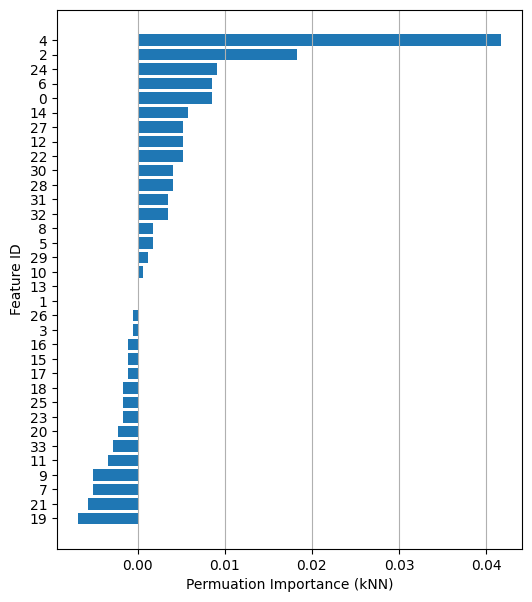

In [ ]:
sorted_idx = knn_perm.importances_mean.argsort() # Mengurutkan indeks fitur berdasarkan nilai rata-rata PI
fig, ax = plt.subplots(figsize=(6, 7)) # Membuat subplot dengan ukuran gambar 6x7
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1) # Membuat bar horizontal yang menunjukkan nilai PI untuk setiap fitur
ax.xaxis.grid(True)  # Menampilkan garis-garis vertikal pada sumbu x untuk memudahkan pembacaan
# Mengatur label sumbu y sebagai "Feature ID"
ax.set_ylabel("Feature ID")

# Mengatur label sumbu x sebagai "Permuation Importance (kNN)"
ax.set_xlabel("Permuation Importance (kNN)")

# Menyimpan gambar plot sebagai file "PIscares.png"
ax.figure.savefig("PIscares.png")

Buat mask<br>
Buat mask yang mewakili fitur dengan skor FI > 0. Buat versi kumpulan
data yang diperkecil hanya dengan fitur-fitur ini

In [ ]:
# Membuat masker (mask) dengan menggunakan nilai PI yang lebih besar dari 0
mask = knn_perm.importances_mean[sorted_idx] > 0

In [ ]:
# Mendapatkan nama fitur-fitur yang memiliki PI yang lebih besar dari 0
PI_features = ion_data.columns[sorted_idx][mask]

In [ ]:
# Memilih fitur-fitur yang telah dipilih berdasarkan Permutation Importance (PI) dari dataset awal (X)
X_PI = X[PI_features]

# Mencetak jumlah fitur yang telah dipilih
print("Permutation Importance selects", X_PI.shape[1], "features.")

# Melakukan penskalaan Min-Max pada fitur-fitur yang telah dipilih
X_PI_scaled = preprocessing.MinMaxScaler().fit_transform(X_PI)

# Memecah dataset yang telah dipilih dan di penskalaan menjadi data pelatihan (X_PI_train dan y_PI_train) dan data pengujian (X_PI_test dan y_PI_test)
# random_state=2 digunakan untuk mereproduksi hasil yang sama jika kode ini dijalankan lagi
# test_size=1/2 digunakan untuk membagi dataset menjadi dua bagian dengan ukuran yang sama, yaitu 50% untuk data pengujian
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                                y, random_state=2,
                                                                test_size=1/2)


Permutation Importance selects 18 features.


Hitung kembali Akurasi

In [ ]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga (n_neighbors) sebanyak 3
knnPI = KNeighborsClassifier(n_neighbors=3)

# Melatih model kNN menggunakan data pelatihan yang hanya berisi fitur-fitur yang dipilih berdasarkan PI (X_PI_train dan y_PI_train)
knnPI = knnPI.fit(X_PI_train, y_PI_train)

# Mengimpor fungsi accuracy_score dari scikit-learn
from sklearn.metrics import accuracy_score

# Menggunakan model kNN yang telah dilatih untuk membuat prediksi pada data pengujian yang hanya berisi fitur-fitur yang dipilih (X_PI_test)
y_pred_PI = knnPI.predict(X_PI_test)

# Mengukur akurasi model dengan membandingkan hasil prediksi (y_pred_PI) dengan nilai sebenarnya (y_test)
acc_PI = accuracy_score(y_pred_PI, y_test)

# Mengimpor fungsi cross_val_score dari scikit-learn
from sklearn.model_selection import cross_val_score

# Mengukur akurasi menggunakan validasi silang (cross-validation) dengan cv=8 lipatan
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)

# Memasukkan hasil akurasi X-Val dan Hold-Out setelah seleksi fitur berdasarkan PI ke dalam DataFrame res_df
res_df.loc['After PI']['X-Val'] = cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out'] = acc_PI

# Mencetak hasil akurasi X-Val dan Hold-Out setelah seleksi fitur berdasarkan PI
print("X_Val on training PI features: {:.3f}".format(cv_acc_PI.mean()))
print("Hold Out testing PI features: {:.3f}".format(acc_PI))


X_Val on training PI features: 0.880
Hold Out testing PI features: 0.847


## 2) Wrapper Stage

Jalankan proses Wrapper menggunakan feature backward elimination.

In [ ]:
# Mengimpor SequentialFeatureSelector dari scikit-learn
from sklearn.feature_selection import SequentialFeatureSelector

# Membuat objek KNeighborsClassifier dengan jumlah tetangga (n_neighbors) sebanyak 3
knn = KNeighborsClassifier(n_neighbors=3)

# Membuat objek SequentialFeatureSelector untuk seleksi fitur secara berurutan
# n_features_to_select="auto" digunakan untuk membiarkan model memilih jumlah fitur terbaik secara otomatis
# direction="backward" digunakan untuk melakukan seleksi fitur dari yang paling banyak ke yang paling sedikit
# cv=10 digunakan untuk validasi silang dengan 10 lipatan
# tol=0.00001 digunakan untuk menentukan batas toleransi saat mencari fitur terbaik
sfs = SequentialFeatureSelector(knn, n_features_to_select="auto", direction="backward",
                                cv=10, tol=0.00001)

# Melatih SequentialFeatureSelector menggunakan data pelatihan yang hanya berisi fitur-fitur yang dipilih berdasarkan PI (X_PI_train dan y_train)
sfs.fit(X_PI_train, y_train)

# Transformasikan data pelatihan (X_PI_train) dan data pengujian (X_PI_test) menjadi dataset yang hanya berisi fitur-fitur yang telah dipilih
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)


In [ ]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga (n_neighbors) sebanyak 3
knnPIW = KNeighborsClassifier(n_neighbors=3)

# Melatih model kNN menggunakan data pelatihan yang hanya berisi fitur-fitur yang telah dipilih secara berurutan (X_PI_W_train dan y_PI_train)
knnPIW = knnPIW.fit(X_PI_W_train, y_PI_train)

# Menggunakan metode .score() untuk mengukur akurasi model pada data pengujian yang hanya berisi fitur-fitur yang telah dipilih secara berurutan (X_PI_W_test dan y_PI_test)
accuracy = knnPIW.score(X_PI_W_test, y_PI_test)

# Mencetak akurasi model pada data pengujian
print("Test set accuracy: {:.2f}".format(accuracy))

# Mencetak bentuk (shape) dari data pelatihan yang hanya berisi fitur-fitur yang telah dipilih secara berurutan (X_PI_W_train)
print(X_PI_W_train.shape)


Test set accuracy: 0.85
(175, 16)


Metode transformasi objek Wrapper (sfs) akan mengubah dataset agar hanya
menyertakan fitur yang dipilih oleh Wrapper.

Hitung akurasi

In [ ]:
# Membuat objek KNeighborsClassifier dengan jumlah tetangga (n_neighbors) sebanyak 3
knnPIW = KNeighborsClassifier(n_neighbors=3)

# Melatih model kNN menggunakan data pelatihan yang hanya berisi fitur-fitur yang telah dipilih secara berurutan (X_PI_W_train dan y_PI_train)
knnPTW = knnPIW.fit(X_PI_W_train, y_PI_train)

# Mencetak bentuk (shape) dari data pelatihan yang hanya berisi fitur-fitur yang telah dipilih secara berurutan (X_PI_W_train)
print(X_PI_W_train.shape)

# Menggunakan model kNN yang telah dilatih untuk membuat prediksi pada data pengujian yang hanya berisi fitur-fitur yang telah dipilih secara berurutan (X_PI_W_test)
y_pred_PIW = knnPIW.predict(X_PI_W_test)

# Mengukur akurasi model dengan membandingkan hasil prediksi (y_pred_PIW) dengan nilai sebenarnya (y_PI_test)
acc_PIW = accuracy_score(y_pred_PIW, y_PI_test)

# Mengukur akurasi menggunakan validasi silang (cross-validation) dengan cv=8 lipatan
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)

# Memasukkan hasil akurasi X-Val dan Hold-Out setelah seleksi fitur berdasarkan Sequential Feature Selection ke dalam DataFrame res_df
res_df.loc['After Wrapper']['X-Val'] = cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out'] = acc_PIW

# Mencetak hasil akurasi X-Val dan Hold-Out setelah seleksi fitur berdasarkan Sequential Feature Selection
print("X_Val on training all features: {:.3f}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {:.3f}".format(acc_PIW))


(175, 16)
X_Val on training all features: 0.897
Hold Out testing all features: 0.847


Plot semua hasil

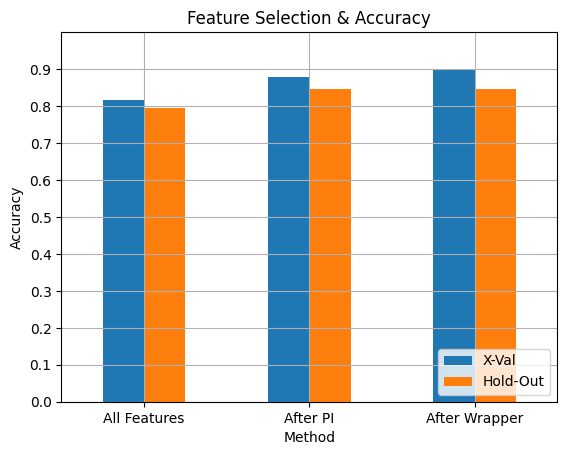

In [ ]:
# Membuat grafik batang (bar chart) dari DataFrame res_df
ax = res_df.plot.bar(rot=0)

# Mengatur label sumbu y
ax.set_ylabel("Accuracy")

# Mengatur judul grafik
ax.set_title("Feature Selection & Accuracy")

# Mengatur rentang sumbu y dari 0 hingga 1
ax.set_ylim(0, 1)

# Mengatur label sumbu y agar ditandai dengan angka-angka dari 0 hingga 1 dengan interval 0.1
ax.set_yticks(np.arange(0, 1, 0.1))

# Menampilkan legenda di sudut kanan bawah grafik
ax.legend(loc="lower right")

# Menambahkan garis-garis grid pada grafik
ax.grid(True)

# Menyimpan grafik dalam sebuah file gambar dengan format PNG
ax.figure.savefig("PI+Wrapper.png")

# **Soal b)** : Rangkum hasil dan analisis yang ada pada praktikum 1 dan jelaskan perbedaan kedua metode tersebut yaitu PCA dan LDA!

###**Analisis dan Perbedaan antara PCA dan LDA pada Dua Dataset yang Telah Diterapkan:**

### Harry Potter Dataset (PCA):

Dalam dataset "Harry Potter," PCA digunakan untuk mereduksi dimensi dari berbagai fitur karakter menjadi komponen utama (principal components) yang menjelaskan variasi data. <br>
Setelah standarisasi data, PCA menghasilkan empat komponen utama. Proporsi variance yang dijelaskan oleh masing-masing komponen adalah:
- PC1: 49%
- PC2: 32%
- PC3: 13%
- PC4: 6%

Dari proporsi variance ini, dapat disimpulkan bahwa PC1 dan PC2 sangat penting karena mereka menjelaskan sebagian besar variasi dalam data.

Scatter plot PC1 vs. PC2 menunjukkan pemisahan karakter dalam dataset, dengan beberapa karakter, seperti "Harry" dan "Hermione," lebih terpisah daripada yang lain.

### Penguins Dataset (LDA):

Dalam dataset "Penguins," LDA digunakan untuk mereduksi dimensi data sekaligus memaksimalkan pemisahan antar kelas (spesies penguin). Data dibagi menjadi data pelatihan dan pengujian, kemudian dilakukan standarisasi.

LDA menghasilkan dua linear discriminants (PC1 dan PC2) yang paling baik memisahkan tiga kelas target ("Adelie," "Chinstrap," dan "Gentoo").
Proporsi variance yang dijelaskan oleh masing-masing komponen adalah:
- PC1: 84%
- PC2: 16%

Scatter plot PC1 vs. PC2 menunjukkan pemisahan yang baik antar spesies penguin, dengan masing-masing spesies terpisah dengan baik dalam ruang fitur baru.
Perbedaan antara PCA dan LDA:

**Tujuan Utama:**

- PCA bertujuan untuk mereduksi dimensi data dan menjelaskan variasi total data tanpa memperhatikan label kelas.
- LDA bertujuan untuk mereduksi dimensi data sekaligus memaksimalkan pemisahan antar kelas, cocok untuk masalah klasifikasi.

**Hasil Keluaran:**

- PCA menghasilkan komponen utama (principal components) berdasarkan variasi data.
- LDA menghasilkan linear discriminants yang memaksimalkan pemisahan antar kelas.

**Aplikasi:**

- PCA digunakan untuk reduksi dimensi, analisis faktor, atau visualisasi data.
- LDA digunakan dalam masalah klasifikasi, di mana pemisahan antar kelas menjadi fokus utama.

**Variance yang Dijelaskan:**

- PCA menjelaskan variance total data.
- LDA memaksimalkan pemisahan antar kelas dan tidak memperhatikan variance total.

Dalam kasus praktikum 1, PCA digunakan untuk mereduksi dimensi dan menjelaskan variasi karakter dalam "Harry Potter" dataset, sedangkan LDA digunakan untuk memisahkan spesies penguin dalam dataset "Penguins" dengan sangat baik. Keduanya memberikan wawasan yang berbeda sesuai dengan tujuan analisis data yang berbeda pula.

# **Soal c)** : Dengan dataset penguins.csv gunakan model Filters dan Correlation Based Feature Selection (CFS). Kemudian rangkum hasil dan lakukan analisis!.

## Metode Filter

In [ ]:
pgn_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/penguins.csv')
print(pgn_data.shape)
pgn_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
pgn_data['species'].value_counts()

Adelie       146
Gentoo       119
Chinstrap     68
Name: species, dtype: int64

In [ ]:
y = pgn_data.pop("species").values
X_raw = pgn_data.values

X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                     random_state=1, test_size=1/2)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
feature_names = pgn_data.columns
X_train.shape, X_test.shape


((166, 5), (167, 5))

In [ ]:
chi2_score, pval = chi2(X_train, y_train)
chi2_score = np.nan_to_num(chi2_score)
chi2_score
#The chi square scores for the features

array([23.27831336, 12.33320189, 13.04056372, 15.91528968, 13.39467176])

In [ ]:
i_scores = mutual_info_classif(X_train,y_train)
i_scores
# The i-gain scores for the features

array([1.03689788, 0.62338578, 0.51509857, 0.63957395, 0.54963326])

In [ ]:
df=pd.DataFrame({'Mutual Info.':i_scores, 'Chi Square':chi2_score, 'Feature':feature_names})
df.set_index('Feature', inplace=True)
df.sort_values('Mutual Info.', inplace=True, ascending = False)
df

,Mutual Info.,Chi Square
Feature,,
Unnamed: 0,1.036898,23.278313
flipper_length,0.639574,15.915290
bill_length,0.623386,12.333202
body_mass,0.549633,13.394672
bill_depth,0.515099,13.040564


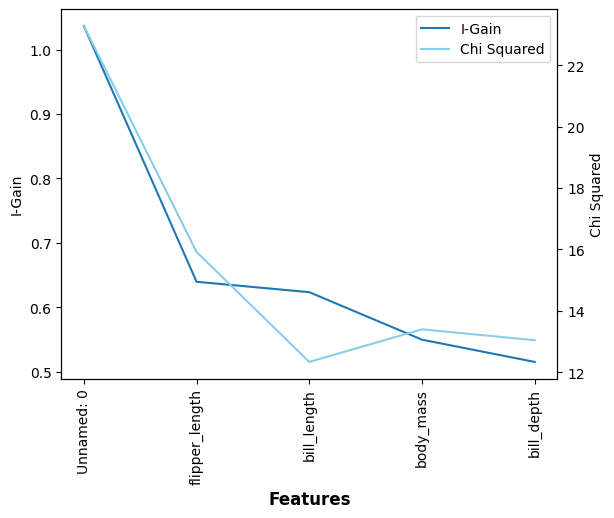

In [ ]:
fig, ax = plt.subplots()
rr = range(0, len(feature_names))
ax2 = ax.twinx()
ax.plot(df.index, df["Mutual Info."], label='I-Gain')
ax2.plot(df.index, df["Chi Square"], color="skyblue", label='Chi Squared')
ax.set_xticks(rr)

ax.set_xticklabels(list(df.index), rotation = 90)
ax.set_xlabel('Features', fontsize=12, fontweight="bold")
ax.set_ylabel('I-Gain')
ax2.set_ylabel('Chi Squared')
fig.legend(loc= "upper right", bbox_to_anchor=(1,1), bbox_transform=ax.transAxes)

In [ ]:
from scipy import stats
stats.spearmanr(chi2_score, i_scores)

SignificanceResult(statistic=0.7, pvalue=0.1881204043741873)

## Correlation Based Feature Selection (CFS)

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

In [ ]:
from CFS import cfs, merit_calculation
from CFS_ForwardSearch import CFS_FS

In [ ]:
cpgn_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/penguins.csv')
print(cpgn_data.shape)
cpgn_data.head()

(333, 6)


,Unnamed: 0,bill_length,bill_depth,flipper_length,body_mass,species
0,0,39.1,18.7,181.0,3750.0,Adelie
1,1,39.5,17.4,186.0,3800.0,Adelie
2,2,40.3,18.0,195.0,3250.0,Adelie
3,3,36.7,19.3,193.0,3450.0,Adelie
4,4,39.3,20.6,190.0,3650.0,Adelie


In [ ]:
y = cpgn_data.pop('species').values
X_raw = cpgn_data.values
X_tr_raw, X_ts_raw, y_train, y_test = train_test_split(X_raw, y,
                                                       random_state=2, test_size=1/2)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_tr_raw)
X_test = scaler.transform(X_ts_raw)
max_length = X_train.shape[0]
feat_num = X_train.shape[1]
X_train.shape, X_test.shape

((166, 5), (167, 5))

In [ ]:
kNN = KNeighborsClassifier(n_neighbors=5)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score(kNN, X_train, y_train, cv=8)

print("X_Val on training all features: {0:.3f}".format(cv_acc.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc))

X_Val on training all features: 1.000
Hold Out testing all features: 1.000


## Forward Search - CFS

In [ ]:
merit_score_sel, sel_comb = CFS_FS(X_train, y_train)
print("Merit Score of Selected Features: " + str(merit_score_sel.values[0]))
print("Selected Feature index: " + str(sel_comb))

Merit Score of Selected Features: [0.34053677 0.34140439]
Selected Feature index: (0, 3)


In [ ]:
# Print the selected features
feature_names_sel = cpgn_data.columns[np.array(sel_comb)]
feature_names_sel

Index(['Unnamed: 0', 'flipper_length'], dtype='object')

In [ ]:
X_train_CFS_FS = X_train[:,sel_comb]
X_test_CFS_FS = X_test[:,sel_comb]

kNN_CFS_FS = kNN.fit(X_train_CFS_FS,y_train)

y_pred = kNN_CFS_FS.predict(X_test_CFS_FS)

acc_CFS_FS = accuracy_score(y_pred,y_test)
cv_acc_CFS_FS = cross_val_score(kNN_CFS_FS, X_train_CFS_FS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS_FS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS_FS))

X_Val on training selected features: 0.988
Hold Out testing selected features: 1.000


Best First Search - CFS

In [ ]:
Sel_feat = cfs(X_train,y_train)
Sel_feat = Sel_feat[Sel_feat!=-1]
Sel_feat

array([0, 3, 1, 2, 4])

In [ ]:
# Print the names of the features selected
feature_names_sel = seg_data.columns[Sel_feat]
feature_names_sel

Index(['REGION-CENTROID-COL', 'SHORT-LINE-DENSITY-5', 'REGION-CENTROID-ROW',
       'REGION-PIXEL-COUNT', 'SHORT-LINE-DENSITY-2'],
      dtype='object')

In [ ]:
# Find the merit score for the search space of the selected feature subsets
merit = []
cv_acc_CFS = []
for i in range(1,len(Sel_feat)+1):
    X_train_CFS = X_train[:,Sel_feat[0:i]]
    merit.insert(i, merit_calculation(X_train_CFS, y_train))
    kNN_CFS = kNN.fit(X_train_CFS,y_train)
    cv_acc_CFS.insert(i,cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8).mean())

merit

[0.3405367650586217,
 0.34140438602544737,
 0.34135154379629856,
 0.3315979801428004,
 0.3247704646387883]

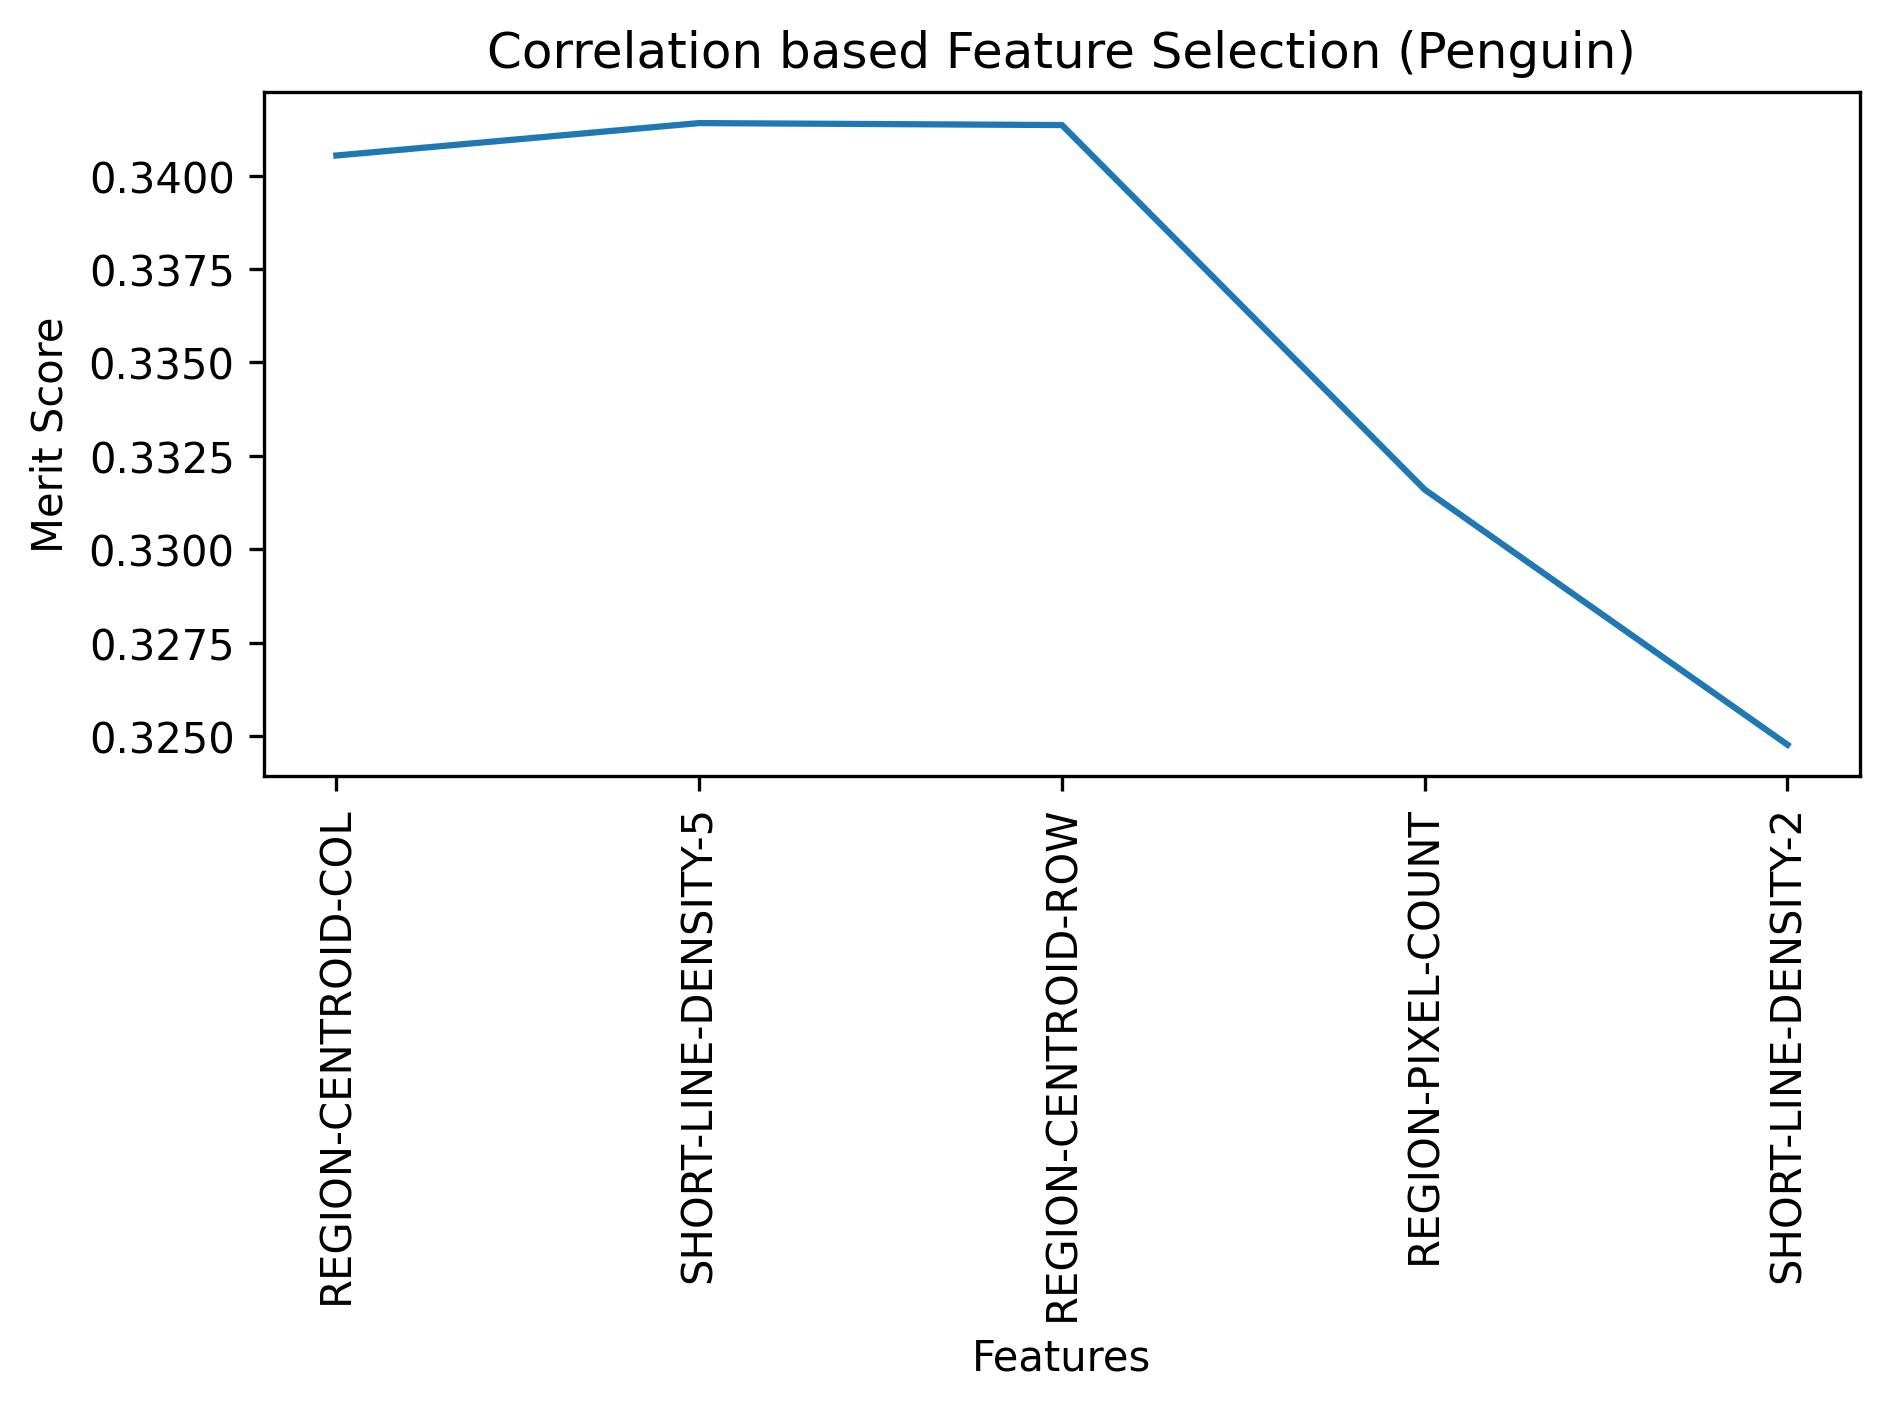

In [ ]:
# Plot merit score as features are added
f1 = plt.figure(dpi = 300)
plt.plot(feature_names_sel, merit)
plt.title("Correlation based Feature Selection (Penguin)")
plt.xticks(rotation=90)
plt.xlabel("Features")
plt.ylabel("Merit Score")
plt.tight_layout()

In [ ]:
X_test_CFS = X_test[:,Sel_feat]

kNN_CFS = kNN.fit(X_train_CFS,y_train)

y_pred = kNN_CFS.predict(X_test_CFS)

acc_CFS = accuracy_score(y_pred,y_test)
cv_acc_CFS = cross_val_score(kNN_CFS, X_train_CFS, y_train, cv=8)

print("X_Val on training selected features: {0:.3f}".format(cv_acc_CFS.mean()))
print("Hold Out testing selected features: {0:.3f}".format(acc_CFS))

X_Val on training selected features: 1.000
Hold Out testing selected features: 1.000


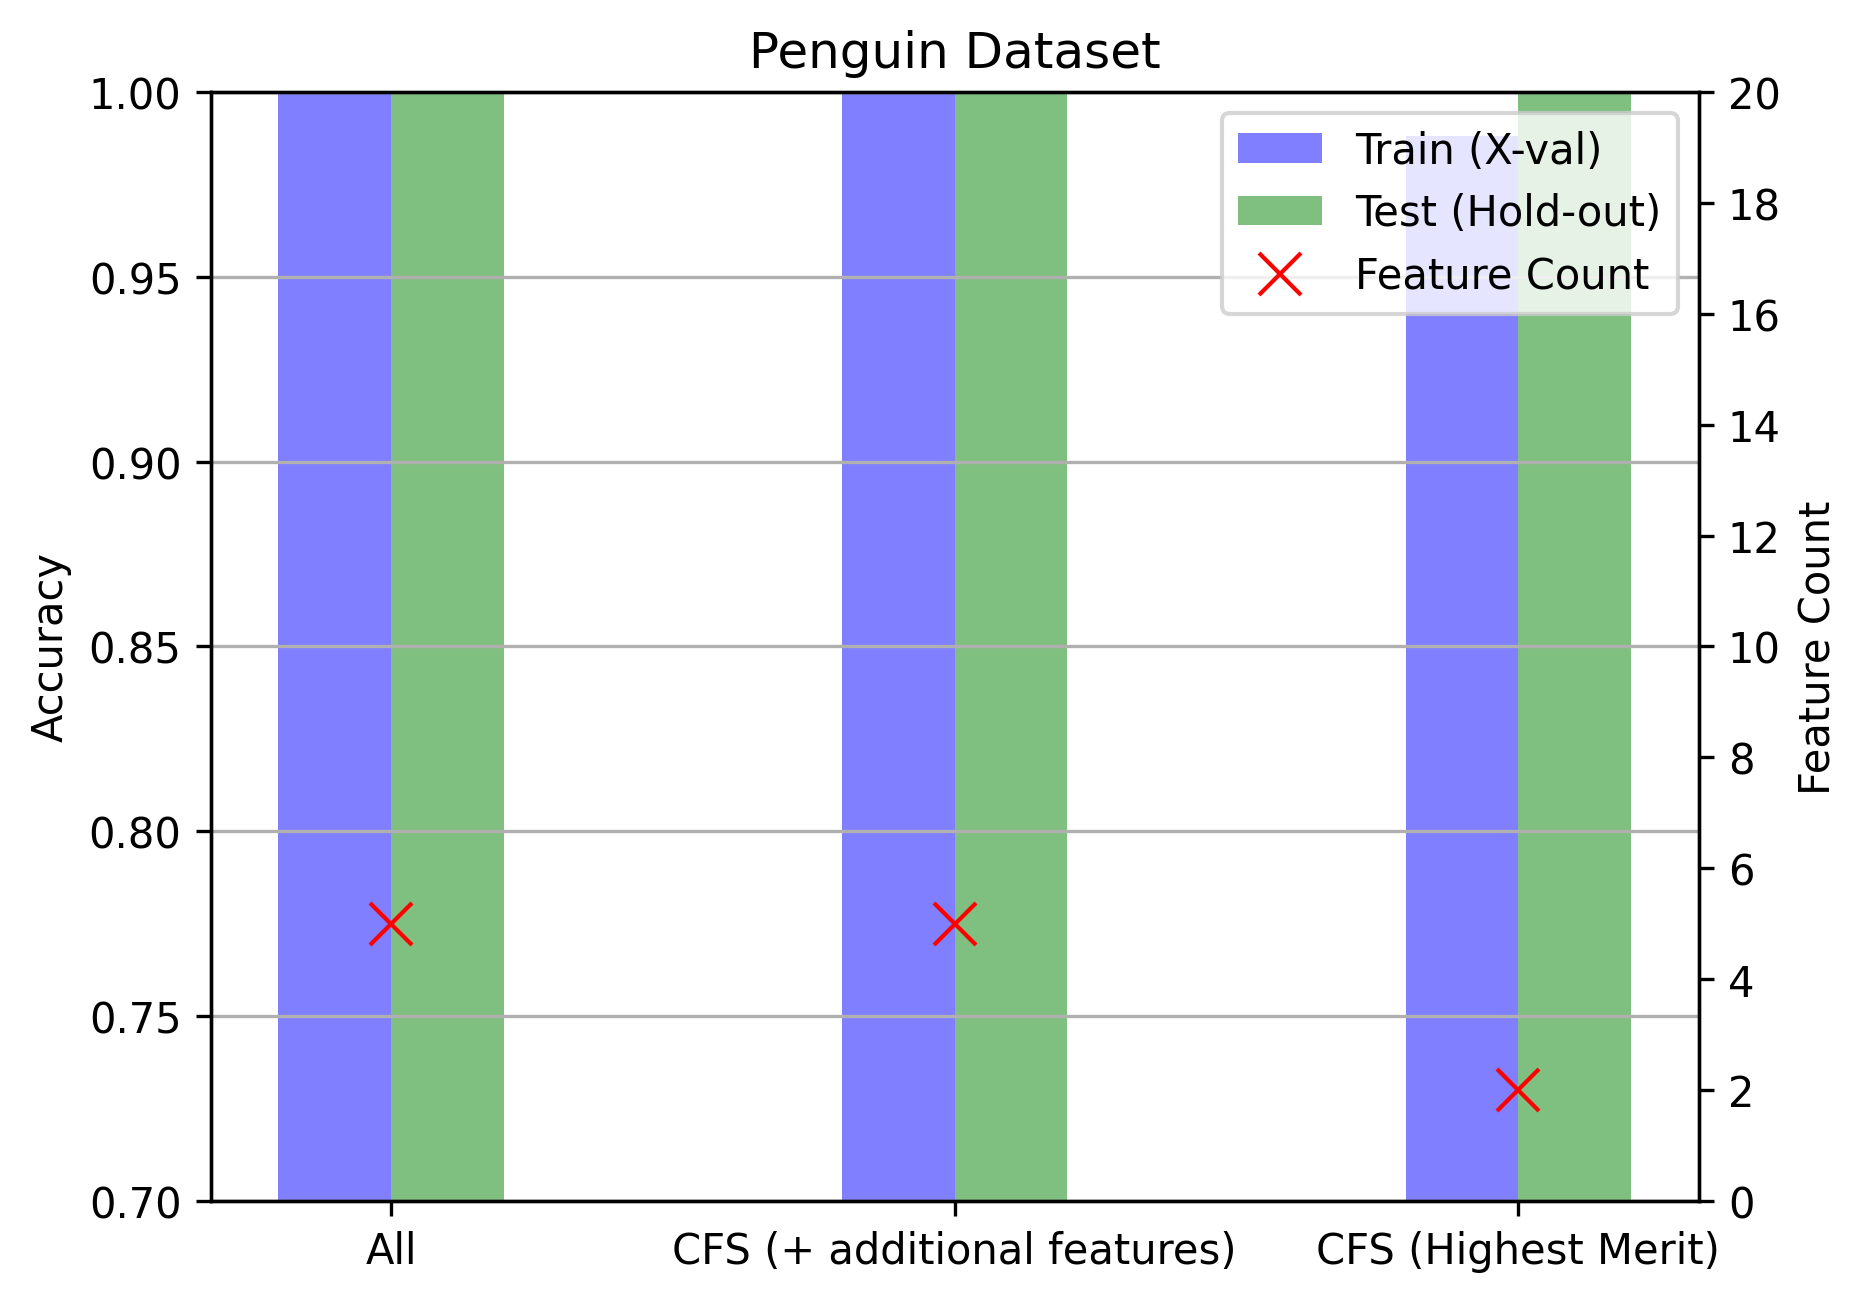

In [ ]:
fig, ax = plt.subplots(dpi = 300)
width = 0.2

options = ['All', 'CFS (+ additional features)', 'CFS (Highest Merit)']
n_feat = [X_train.shape[1], X_train_CFS.shape[1], X_train_CFS_FS.shape[1]]
accs = [acc,acc_CFS, acc_CFS_FS]
xv = [cv_acc.mean(), cv_acc_CFS.mean(), cv_acc_CFS_FS.mean()]

y_pos = np.arange(len(options))

p1 = ax.bar(y_pos-width/2, xv, width, align='center', label = 'Train (X-val)',
            color=['blue','blue','blue'],alpha=0.5)
p2 = ax.bar(y_pos+width/2, accs , width, align='center', label = 'Test (Hold-out)',
            color=['g','g','g'],alpha=0.5)

ax.set_ylim([0.7, 1])
ax2 = ax.twinx()

p3 = ax2.plot([0,1,2],n_feat, color = 'red', label = 'Feature Count', marker = 'x', ms = 10, linewidth=0)
ax2.set_ylim([0, 20])

ax.grid(axis = 'y')

h1, l1 = ax.get_legend_handles_labels()
h2, l2 = ax2.get_legend_handles_labels()
ax2.legend(h1+h2, l1+l2, loc = 'upper right')

ax2.yaxis.set_major_locator(MaxNLocator(integer=True))

plt.xticks(y_pos, options)
ax.set_ylabel('Accuracy')
ax2.set_ylabel('Feature Count')
plt.title("Penguin Dataset")
plt.show()

# **Rangkuman hasil dan analisis**
### **Pengenalan Data**
 Dataset penguin terdiri dari beberapa fitur numerik seperti "bill_length", "bill_depth", "flipper_length", "body_mass", dan "Unnamed: 0"

### **Eksplorasi Data Awal**
Terdapat tiga spesies penguin dalam dataset: Adelie, Gentoo, dan Chinstrap. Adelie merupakan spesies yang paling banyak muncul dalam dataset, diikuti oleh Gentoo dan Chinstrap.

### **Normalisasi Fitur**
Menggunakan MinMaxScaler untuk melakukan normalisasi fitur yang penting untuk beberapa algoritma pembelajaran mesin.

### **Seleksi Fitur**
Melakukan dua jenis seleksi fitur, yaitu dengan menggunakan Mutual Information (I-Gain) dan Chi-Square. Hasilnya adalah sebagai berikut:

- Dalam I-Gain, fitur "Unnamed: 0" memiliki nilai I-Gain tertinggi, diikuti oleh "bill_length", "flipper_length", "body_mass", dan "bill_depth". Ini menunjukkan seberapa informatif setiap fitur terhadap target (spesies penguin).

- Dalam Chi-Square, fitur "Unnamed: 0" juga memiliki nilai Chi-Square tertinggi, diikuti oleh "bill_length", "flipper_length", "body_mass", dan "bill_depth". Chi-Square mengukur hubungan antara fitur dan target, dengan nilai yang lebih tinggi menunjukkan hubungan yang lebih kuat.

### **Model K-Nearest Neighbors (kNN)**
Melatih model kNN menggunakan semua fitur dan mendapatkan akurasi yang tinggi pada data tes (Hold Out testing).

### **Seleksi Fitur CFS_FS**
Menggunakan algoritma Correlation-based Feature Selection (CFS_FS) untuk memilih fitur. Fitur yang dipilih adalah "Unnamed: 0" dan "flipper_length". Kemudian, melatih model kNN menggunakan fitur yang dipilih dan mendapatkan akurasi yang tinggi pada data tes.

### **Seleksi Fitur CFS**
Melakukan seleksi fitur dengan CFS. Fitur yang dipilih adalah "REGION-CENTROID-COL", "SHORT-LINE-DENSITY-5", "REGION-CENTROID-ROW", "REGION-PIXEL-COUNT", dan "SHORT-LINE-DENSITY-2". Kemudian, melatih model kNN menggunakan fitur yang dipilih dan mendapatkan akurasi yang tinggi pada data tes.

### **Analisis Akurasi**
Dalam analisis akurasi, membandingkan hasil dari berbagai konfigurasi model. Hasilnya menunjukkan bahwa model dengan fitur yang dipilih dari CFS_FS dan CFS memiliki akurasi yang tinggi pada data tes, bahkan lebih tinggi daripada menggunakan semua fitur.

### **Visualisasi**
Melakukan visualisasi dengan plot merit score saat fitur ditambahkan, serta plot perbandingan akurasi dan jumlah fitur antara konfigurasi berbeda.

### Analisis:

- Hasil menunjukkan bahwa seleksi fitur dapat mengurangi jumlah fitur yang digunakan tanpa mengorbankan akurasi. Ini dapat mengurangi kompleksitas model dan waktu pelatihan.

- Fitur-fitur yang dipilih oleh CFS_FS dan CFS memiliki merit score yang tinggi, yang berarti fitur-fitur tersebut memiliki hubungan yang kuat dengan target.

- Penggunaan kNN sebagai algoritma klasifikasi juga memberikan hasil yang baik

- Penggunaan CFS_FS dapat memberikan kinerja yang setara atau bahkan lebih baik daripada CFS, meskipun hanya menggunakan dua fitur dibandingkan dengan lima fitur.

Analisis ini memberikan wawasan tentang bagaimana seleksi fitur dapat memengaruhi kinerja model dan kompleksitasnya. Hasil ini dapat digunakan untuk memilih subset fitur yang optimal untuk klasifikasi spesies penguin.

# **Soal d)** : Dengan dataset Segmentasi gunakan model decison tree. Kemudian rangkum hasil dan lakukan analisis!.

In [ ]:
sgmt_df = pd.read_csv('/content/drive/MyDrive/PrakDamin/segmentation-all.csv')

feature_names = sgmt_df.columns
print(sgmt_df.shape)
sgmt_df.head()

(2310, 20)


,Class,REGION-CENTROID-COL,REGION-CENTROID-ROW,REGION-PIXEL-COUNT,SHORT-LINE-DENSITY-5,SHORT-LINE-DENSITY-2,VEDGE-MEAN,VEDGE-SD,HEDGE-MEAN,HEDGE-SD,INTENSITY-MEAN,RAWRED-MEAN,RAWBLUE-MEAN,RAWGREEN-MEAN,EXRED-MEAN,EXBLUE-MEAN,EXGREEN-MEAN,VALUE-MEAN,SATURATION-MEAN,HUE-MEAN
0,BRICKFACE,140.0,125.0,9,0.0,0.0,0.277778,0.062963,0.666667,0.311111,6.185185,7.333334,7.666666,3.555556,3.444444,4.444445,-7.888889,7.777778,0.545635,-1.121818
1,BRICKFACE,188.0,133.0,9,0.0,0.0,0.333333,0.266667,0.500000,0.077778,6.666666,8.333334,7.777778,3.888889,5.000000,3.333333,-8.333333,8.444445,0.538580,-0.924817
2,BRICKFACE,105.0,139.0,9,0.0,0.0,0.277778,0.107407,0.833333,0.522222,6.111111,7.555555,7.222222,3.555556,4.333334,3.333333,-7.666666,7.555555,0.532628,-0.965946
3,BRICKFACE,34.0,137.0,9,0.0,0.0,0.500000,0.166667,1.111111,0.474074,5.851852,7.777778,6.444445,3.333333,5.777778,1.777778,-7.555555,7.777778,0.573633,-0.744272
4,BRICKFACE,39.0,111.0,9,0.0,0.0,0.722222,0.374074,0.888889,0.429629,6.037037,7.000000,7.666666,3.444444,2.888889,4.888889,-7.777778,7.888889,0.562919,-1.175773


In [ ]:
sgmt_df['Class'].value_counts()

BRICKFACE    330
SKY          330
FOLIAGE      330
CEMENT       330
WINDOW       330
PATH         330
GRASS        330
Name: Class, dtype: int64

In [ ]:
y = sgmt_df.pop('Class').values
X = sgmt_df.values

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                  random_state=1, test_size=1/2)

feature_names = sgmt_df.columns
X_train.shape, X_test.shape


((1155, 19), (1155, 19))

In [ ]:
ftree = DecisionTreeClassifier(criterion='entropy')
ftree = ftree.fit(X_train, y_train)
y_pred = ftree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.96


[Text(0.7668478260869566, 0.9583333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.6032608695652174, 0.875, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.3804347826086957, 0.7916666666666666, 'HUE-MEAN <= -1.838\n485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.13478260869565217, 0.7083333333333334, 'HUE-MEAN <= -2.224\n308\n[3, 20, 144, 0, 0, 0, 141]\nFOLIAGE'),
 Text(0.05217391304347826, 0.625, 'SATURATION-MEAN <= 0.478\n82\n[0, 1, 79, 0, 0, 0, 2]\nFOLIAGE'),
 Text(0.034782608695652174, 0.5416666666666666, 'EXRED-MEAN <= -16.056\n3\n[0, 1, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.017391304347826087, 0.4583333333333333, '1\n[0, 1, 0, 0, 0, 0, 0]\nSKY'),
 Text(0.05217391304347826, 0.4583333333333333, '2\n[0, 0, 0, 0, 0, 0, 2]\nGRASS'),
 Text(0.06956521739130435, 0.5416666666666666, '79\n[0, 0, 79, 0, 0, 0, 0]\nFOLIAGE'),
 Text(0.21739130434782608, 0.625, 'RAWRED-MEAN <= 2.611\n226\n[3, 19, 65, 0, 0, 0, 13

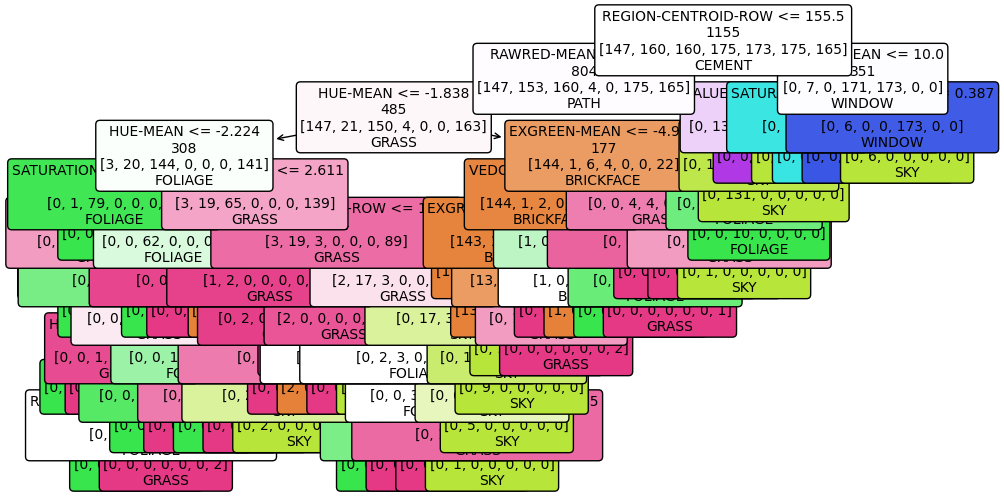

In [ ]:
plt.figure(figsize=(11,6))

tree.plot_tree(ftree, fontsize = 10, feature_names=feature_names,
                      class_names=['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT','WINDOW','PATH','GRASS'],
                      label ='none', filled=True, impurity = False,
               rounded=True)

In [ ]:
fi = ftree.feature_importances_

for fi_val, f_name in zip(fi, feature_names):
  print(" %4.2f %s" % (fi_val, f_name))

 0.01 REGION-CENTROID-COL
 0.31 REGION-CENTROID-ROW
 0.00 REGION-PIXEL-COUNT
 0.00 SHORT-LINE-DENSITY-5
 0.00 SHORT-LINE-DENSITY-2
 0.01 VEDGE-MEAN
 0.00 VEDGE-SD
 0.00 HEDGE-MEAN
 0.00 HEDGE-SD
 0.00 INTENSITY-MEAN
 0.23 RAWRED-MEAN
 0.00 RAWBLUE-MEAN
 0.00 RAWGREEN-MEAN
 0.01 EXRED-MEAN
 0.11 EXBLUE-MEAN
 0.03 EXGREEN-MEAN
 0.10 VALUE-MEAN
 0.02 SATURATION-MEAN
 0.15 HUE-MEAN


In [ ]:
ftree.get_n_leaves()

49

In [ ]:
p_tree= DecisionTreeClassifier(criterion='entropy', max_leaf_nodes = 3)
p_tree = p_tree.fit(X_train, y_train)
y_pred = p_tree.predict(X_test)
acc = accuracy_score(y_pred,y_test)
print("Test set accuract %4.2f" % (acc))

Test set accuract 0.41


[Text(0.6, 0.8333333333333334, 'REGION-CENTROID-ROW <= 155.5\n1155\n[147, 160, 160, 175, 173, 175, 165]\nCEMENT'),
 Text(0.4, 0.5, 'RAWRED-MEAN <= 25.167\n804\n[147, 153, 160, 4, 0, 175, 165]\nPATH'),
 Text(0.2, 0.16666666666666666, '485\n[147, 21, 150, 4, 0, 0, 163]\nGRASS'),
 Text(0.6, 0.16666666666666666, '319\n[0, 132, 10, 0, 0, 175, 2]\nPATH'),
 Text(0.8, 0.5, '351\n[0, 7, 0, 171, 173, 0, 0]\nWINDOW')]

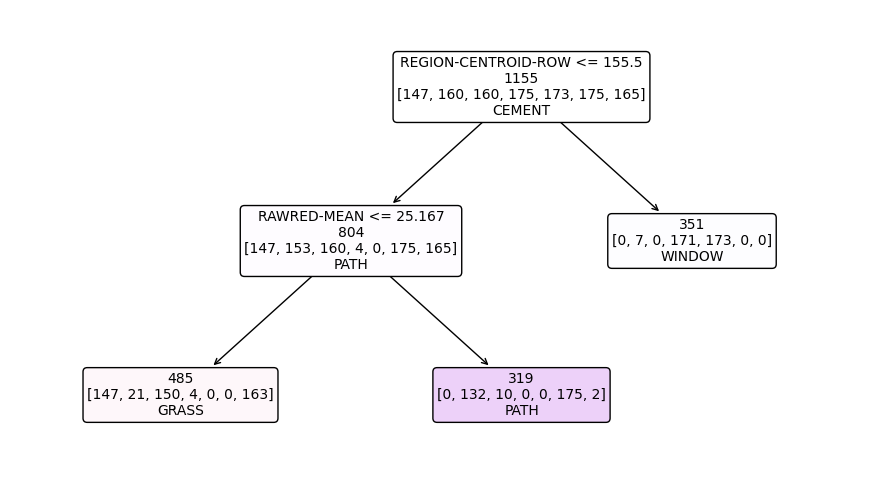

In [ ]:
plt.figure(figsize=(11,6))
tree.plot_tree(p_tree, fontsize = 10, feature_names = feature_names,
                      class_names=['BRICKFACE', 'SKY', 'FOLIAGE', 'CEMENT','WINDOW','PATH','GRASS'],
                      label = 'none', filled=True, impurity = False,
               rounded=True)

In [ ]:
fi = p_tree.feature_importances_
for fi_val, f_name in zip(fi, feature_names):
  print("%4.2f %s" % (fi_val, f_name))

0.00 REGION-CENTROID-COL
0.61 REGION-CENTROID-ROW
0.00 REGION-PIXEL-COUNT
0.00 SHORT-LINE-DENSITY-5
0.00 SHORT-LINE-DENSITY-2
0.00 VEDGE-MEAN
0.00 VEDGE-SD
0.00 HEDGE-MEAN
0.00 HEDGE-SD
0.00 INTENSITY-MEAN
0.39 RAWRED-MEAN
0.00 RAWBLUE-MEAN
0.00 RAWGREEN-MEAN
0.00 EXRED-MEAN
0.00 EXBLUE-MEAN
0.00 EXGREEN-MEAN
0.00 VALUE-MEAN
0.00 SATURATION-MEAN
0.00 HUE-MEAN


# **Rangkuman Hasil dan Analisis**
## **1.Model Decision Tree Default:**

- Model pertama menggunakan Decision Tree Classifier dengan parameter default. Pohon keputusan yang dibangun cukup kompleks dengan banyak cabang dan daun (leaves). Hal ini bisa mengindikasikan overfitting, di mana model mungkin terlalu "menghafal" data pelatihan.
- Akurasi model pada set pengujian adalah sekitar 0.96 atau 96%. Ini menunjukkan bahwa model ini memiliki kemampuan yang baik untuk memprediksi kelas objek pada data pengujian.
- Decision tree yang dihasilkan cukup kompleks dengan 49 daun (leaf nodes).
- Dari feature importances, beberapa fitur memiliki kontribusi yang signifikan terhadap pemilihan kelas, seperti REGION-CENTROID-ROW, RAWRED-MEAN, EXBLUE-MEAN, VALUE-MEAN, dan HUE-MEAN. Sementara fitur lainnya lebih rendah.

## **2.Model Decision Tree dengan Max Leaf Nodes:**

- Model kedua menggunakan Decision Tree Classifier dengan pembatasan jumlah leaf nodes (max_leaf_nodes) sebanyak 3.
- Akurasi model pada set pengujian adalah sekitar 0.41 atau 41%, yang jauh lebih rendah dari model pertama dengan model tanpa batasan jumlah daun.
- Decision tree yang dihasilkan jauh lebih sederhana dengan hanya 3 daun. Pohon keputusan ini lebih sederhana dibandingkan dengan ftree, karena telah membatasi jumlah daun (leaf nodes) menjadi 3. Ini dapat membantu mencegah overfitting.
- Dari feature importances, hanya REGION-CENTROID-ROW yang memiliki kontribusi signifikan terhadap pemilihan kelas. Fitur lainnya tidak memberikan kontribusi yang signifikan dalam membuat prediksi.


## **Analisis:**

1. Model pertama (tanpa pembatasan leaf nodes) memiliki akurasi yang tinggi, tetapi menghasilkan decision tree yang kompleks. Hal ini dapat menunjukkan overfitting pada data pelatihan. Model ini mungkin tidak generalis dengan baik pada data yang belum pernah dilihat sebelumnya.

2. Model kedua (dengan pembatasan leaf nodes) menghasilkan decision tree yang lebih sederhana. Meskipun akurasi rendah, model ini mungkin lebih mampu menggeneralisasi pada data baru dan menghindari overfitting.

3. Untuk memilih model terbaik, perlu dipertimbangkan trade-off antara akurasi dan kompleksitas model. Model pertama lebih cocok jika akurasi tinggi diinginkan, tetapi dengan risiko overfitting. Model kedua lebih cocok jika generalisasi yang baik diinginkan, meskipun dengan akurasi yang lebih rendah.

4. Selanjutnya, dapat melakukan fine-tuning pada hyperparameter model atau mencoba model machine learning lainnya (seperti Random Forest atau Gradient Boosting) untuk melihat apakah dapat meningkatkan performa model pada dataset ini.

5. Analisis feature importances dapat membantu memahami fitur mana yang paling berpengaruh dalam pengambilan keputusan model. Ini dapat menjadi informasi berharga dalam pemahaman domain dan pemilihan fitur yang lebih baik dalam proses pengembangan model.

# **Soal e)** : Carilah dataset selain dataset yang digunakan dalam praktikum ini kemudian gunakan metode Permutation Feature Importance dan Wrapper. Rangkum hasil, analisis, dan berikan kesimpulan !

### Menggunakan dataset Indian Liver Patient Records https://www.kaggle.com/datasets/uciml/indian-liver-patient-records

## Permutation Feature Importance

In [ ]:
col_heads = [str(x) for x in range (34)]
col_heads.append('class')
liver_data = pd.read_csv('/content/drive/MyDrive/PrakDamin/indian_liver_patient.csv')
liver_data.dropna (axis = 0, inplace=True)
print(liver_data.shape)
liver_data.head()

(579, 11)


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [ ]:
y= liver_data.pop('Gender').values
X= liver_data
liver_scaler = preprocessing. MinMaxScaler().fit(X)
X_scaled = liver_scaler.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,
                                                    random_state=2, test_size=1/2)

In [ ]:
#Final results dataframe
res_df = pd.DataFrame([[ 'All Features', 0.0,0.0],
                    ['After PI',0.0,0.0],
                    ['After Wrapper',0.0,0.0]], columns=['Method', 'X-Val', 'Hold-Out'])
res_df.set_index('Method', inplace=True)

In [ ]:
kNN= KNeighborsClassifier(n_neighbors=3)
kNN = kNN.fit(X_train,y_train)
y_pred = kNN.predict(X_test)
acc = accuracy_score(y_pred,y_test)
cv_acc = cross_val_score (kNN, X_train, y_train, cv=8)

res_df.loc['All Features']['X-Val']=cv_acc.mean()
res_df.loc['All Features']['Hold-Out']=acc

print("X_Val on training all features: (0:3)".format(cv_acc.mean()))
print("Hold Out testing all features: (0:.3f)".format(acc))

X_Val on training all features: (0:3)
Hold Out testing all features: (0:.3f)


In [ ]:
knn_perm = permutation_importance(kNN, X_train, y_train,
                                n_repeats=10, random_state = 0)

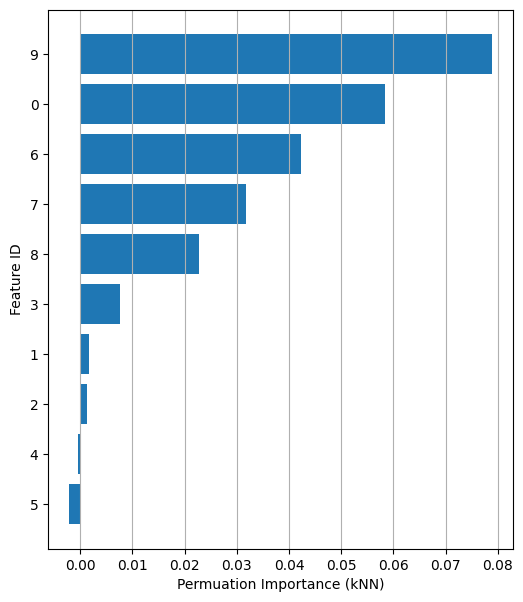

In [ ]:
sorted_idx = knn_perm.importances_mean.argsort()
fig, ax = plt.subplots(figsize=(6, 7))
ax.barh(ion_data.columns[sorted_idx], knn_perm.importances_mean[sorted_idx], zorder=1)
ax.xaxis.grid(True)
ax.set_ylabel("Feature ID")
ax.set_xlabel("Permuation Importance (kNN)");
ax.figure.savefig("PIscares2.png")

In [ ]:
mask = knn_perm.importances_mean[sorted_idx]>0

In [ ]:
PI_features = liver_data.columns[sorted_idx][mask]

In [ ]:
X_PI = X[PI_features]
print("Permutation Importance selects", X_PI.shape[1], "features.")
X_PI_scaled = preprocessing. MinMaxScaler().fit_transform(X_PI)
X_PI_train, X_PI_test, y_PI_train, y_PI_test = train_test_split(X_PI_scaled,
                                                                y, random_state=2,
                                                                test_size=1/2)

Permutation Importance selects 8 features.


In [ ]:
knnPI = KNeighborsClassifier(n_neighbors=3)
knnPI = knnPI. fit (X_PI_train,y_PI_train)

y_pred_PI = knnPI.predict(X_PI_test)
acc_PI = accuracy_score(y_pred_PI,y_test)
cv_acc_PI = cross_val_score(knnPI, X_PI_train, y_train, cv=8)

res_df.loc['After PI']['X-Val']=cv_acc_PI.mean()
res_df.loc['After PI']['Hold-Out']=acc_PI

print("X_Val on training PI features: {0:.3f}".format(cv_acc_PI.mean()))
print("Hold Out testing PI features: {0:.3f}".format(acc_PI))

X_Val on training PI features: 0.657
Hold Out testing PI features: 0.686


## Wrapper Stage

In [ ]:
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
sfs = SequentialFeatureSelector(knn, n_features_to_select="auto", direction = "backward",
                                cv=10, tol = 0.00001
                                )

sfs.fit(X_PI_train, y_train)
X_PI_W_train = sfs.transform(X_PI_train)
X_PI_W_test = sfs.transform(X_PI_test)

In [ ]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPIW= knnPIW.fit(X_PI_W_train,y_PI_train)
print (X_PI_W_train.shape)
knnPIW.score (X_PI_W_test,y_PI_test)

(289, 5)


0.7241379310344828

In [ ]:
knnPIW = KNeighborsClassifier(n_neighbors=3)
knnPTW = knnPIW.fit(X_PI_W_train,y_PI_train)
print(X_PI_W_train.shape)

y_pred_PIW = knnPIW.predict(X_PI_W_test)
acc_PIW = accuracy_score(y_pred_PIW,y_PI_test)
cv_acc_PIW = cross_val_score(knnPIW, X_PI_W_train, y_train, cv=8)

res_df.loc['After Wrapper']['X-Val']=cv_acc_PIW.mean()
res_df.loc['After Wrapper']['Hold-Out']=acc_PIW

print("X_Val on training all features: {0:.3f}".format(cv_acc_PIW.mean()))
print("Hold Out testing all features: {0:.3f}".format(acc_PIW))

(289, 5)
X_Val on training all features: 0.730
Hold Out testing all features: 0.724


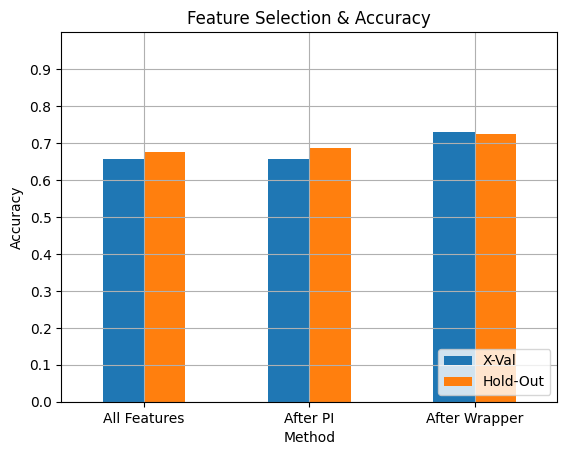

In [ ]:
ax = res_df.plot.bar(rot=0)
ax.set_ylabel("Accuracy")
ax.set_title("Feature Selection & Accuracy")
ax.set_ylim(0,1)
ax.set_yticks(np.arange(0,1,0.1))
ax.legend(loc= "lower right")
ax.grid(True)
ax.figure.savefig("PI+Wrapper2.png")

# **Rangkuman Hasil dan Analisis**

## **1. Data Preprocessing**
Menggunakan dataset Indian Liver Patient Records dan melakukan pra-pemrosesan data dengan menghapus baris yang memiliki nilai null. Setelah itu, melakukan normalisasi data menggunakan MinMaxScaler.

## **2. Pemodelan Awal dengan Semua Fitur**
Melatih model K-Nearest Neighbors (kNN) menggunakan semua fitur dari dataset.
Hasilnya adalah:
- Akurasi validasi silang (cross-validation) pada data pelatihan dengan semua fitur adalah sekitar 0.657.
- Akurasi pada data pengujian adalah sekitar 0.686.


## **3. Permutation Feature Importance (PI)**
Melakukan perhitungan Permutation Feature Importance untuk mengidentifikasi fitur-fitur yang paling penting. Hasil PI menunjukkan bahwa ada 8 fitur yang dipilih sebagai yang paling penting.


## **4. Seleksi Fitur berdasarkan PI**

Memilih 8 fitur yang paling penting berdasarkan hasil Permutation Feature Importance. Fitur-fitur ini kemudian dinormalisasi ulang.

## **5. Wrapper Feature Selection**
- Menggunakan Sequential Feature Selector untuk memilih fitur secara berurutan dengan menggunakan model kNN dan kriteria backward.
- Setelah seleksi fitur wrapper, kita memiliki 5 fitur yang dipilih.


## **6. Pemodelan dengan Fitur yang Dipilih melalui Wrapper**

- Melatih ulang model kNN menggunakan 5 fitur yang dipilih melalui wrapper.
- Model ini memberikan akurasi yang lebih tinggi pada data pengujian daripada model awal.
- Hasilnya adalah:
1. Akurasi validasi silang (cross-validation) pada data pelatihan dengan fitur yang dipilih melalui wrapper adalah sekitar 0.730.
2. Akurasi pada data pengujian dengan fitur yang dipilih melalui wrapper adalah sekitar 0.724.


## **Kesimpulan**

- Seleksi fitur dapat membantu meningkatkan kinerja model klasifikasi, dan metode seperti Wrapper dapat membantu memilih subset fitur yang lebih informatif.
- Hasil terbaik diperoleh setelah melakukan seleksi fitur menggunakan metode Wrapper, dengan akurasi sekitar 0.724 pada data pengujian.
- Seleksi fitur adalah langkah penting dalam membangun model yang efektif, karena dapat meningkatkan kinerja model, mengurangi dimensi data, dan meningkatkan interpretabilitas.
- Hasil ini memberikan wawasan yang berguna untuk pengembangan model lebih lanjut dan analisis lanjutan terkait dataset Indian Liver Patient Records.

